## PROBLEM DESCRIPTION

The evolution of wireless communications is expected to rely on machine learning (ML)-based capabilities to provide proactive management of network resources and sustain quality-of-service (QoS) and user experience. New use cases in the area of vehicular communications, including so-called vehicle-to-everything (V2X) schemes, will benefit strongly from such advances.

The objective of this challenge is to leverage the Berlin V2X dataset to predict QoS. More specifically, several features from the primary and secondary cells of two commercial LTE mobile network operators in the metropolitan area of Berlin can be used alongside GPS and context information to predict the achieved throughput in the downlink.

The results of this challenge will serve as a cornerstone to deploy general solutions for wireless QoS prediction in a multi-domain setup (i.e., across operators, devices and/or link directions).

AI for Good is organized by ITU in partnership with 40 UN Sister Agencies. The goal of AI for Good is to identify practical applications of AI to advance the United Nations Sustainable Development Goals and scale those solutions for global impact. It’s the leading action-oriented, global & inclusive United Nations platform on AI.




The evaluation metric for this competition is Root Mean Squared Error

## ***OBJECTIVE***

## The objective of this challenge is to leverage the Berlin V2X dataset to predict QoS.(Quality of service).

**PROPOSED SOLUTION AND UNDERSTANDNING OF THE OBJECTIVE **

Wireless communications, like mobile networks, are continuously evolving. To make these networks better, we can use a technology called machine learning, which helps computers learn from data and make smart decisions. By using machine learning, we can manage network resources more efficiently and make sure that users have a good experience when using their devices.

In this particular challenge, we have a special dataset called the Berlin V2X dataset. It contains information about the performance of mobile networks in Berlin, specifically focusing on two LTE mobile network operators. The dataset includes data from different areas in the city and also includes information about the location of devices using GPS and other context details.

The goal of this challenge is to use this dataset and apply machine learning techniques to predict a measure called "QoS" (quality of service). QoS is a way to measure how well the network is performing for users. In this case, we want to predict the achieved throughput in the downlink, which means the speed and capacity of data that can be received by devices.

By successfully predicting the achieved throughput, we can create useful solutions that can be used in different situations, even beyond the specific network operators or devices used in the dataset. This means that the methods developed in this challenge can be applied to other scenarios, helping to improve wireless network performance and user experience in a broader sense.

Lets start by importing important libraries

In [ ]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tqdm import tqdm
import math
import gc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns









# Data loading

In [ ]:
#load the dataset
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")
sample_submission = pd.read_csv('SampleSubmission.csv')
Variable=pd.read_csv('VariableDefinitions.csv')

### EXPLORATORY DATA ANALYSIS



I Perform an initial exploration of the train_df dataset to understand its structure, features, and statistical properties. This will help us gain insights into the data and identify any data quality issues

In [ ]:
# Check the dimensions of the dataset
print("Number of rows in train data:", train_df.shape[0])
print("Number of columns in train data:", train_df.shape[1])
# Check the dimensions of the dataset
print("Number of rows in test data:", test_df.shape[0])
print("Number of columns in test data:", test_df.shape[1])

Number of rows in train data: 34274
Number of columns in train data: 41
Number of rows in test data: 18243
Number of columns in test data: 40


we can therefore see that we have approximatley around 40 features that we will be dealing with in our datasets

In [ ]:
# View the first few rows of the dataset
train_df.head()


id   timestamp device  PCell_RSRP_max  PCell_RSRQ_max  \
0  Id_qt2qn56050  1624367008    pc1      -84.498750      -14.586875   
1  Id_f1zf07cwb6  1624372465    pc3      -86.818125      -11.982500   
2  Id_uoxdz7di5b  1624371871    pc3     -101.916250      -13.257500   
3  Id_hzn8nj29gu  1624542066    pc1      -95.598750      -14.696250   
4  Id_2kfrccrfiw  1624542798    pc1      -97.735000      -14.867500   

   PCell_RSSI_max  PCell_SNR_max  PCell_Downlink_Num_RBs  \
0      -49.855625         16.457                 35076.0   
1      -54.838125         16.674                 42704.0   
2      -71.241250          9.392                 36017.0   
3      -61.660000         10.726                 95955.0   
4      -63.170625         10.889                 83062.0   

   PCell_Downlink_Average_MCS  PCell_Downlink_bandwidth_MHz  ...  dewPoint  \
0                        23.0                          20.0  ...     13.86   
1                        24.0                          20.0  ...     14.52   
2                        22.0                          20.0  ...     14.71   
3                        17.0                          20.0  ...     13.43   
4                        19.0                          20.0  ...     13.46   

   humidity  pressure  windSpeed  cloudCover  uvIndex  visibility  \
0      0.62    1013.6       2.39        0.95      4.0      16.093   
1      0.59    1013.5       2.29        0.82      3.0      16.093   
2      0.61    1013.8       2.13        0.82      3.0      16.093   
3      0.71    1017.9       1.97        0.99      3.0      16.093   
4      0.71    1017.9       1.97        0.99      3.0      16.093   

   Traffic Jam Factor         area      target  
0             0.38979  Residential  51500000.0  
1             3.78322  Residential  50300000.0  
2             2.08425  Residential  16500000.0  
3             8.80702       Avenue  46400000.0  
4             2.21843         Park  50200000.0  

[5 rows x 41 columns]

In [ ]:
#variable description to better understand
Variable

VARIABLENAME  \
0                             id   
1                      timestamp   
2                         device   
3                 PCell_RSRP_max   
4                 PCell_RSRQ_max   
5                 PCell_RSSI_max   
6                  PCell_SNR_max   
7         PCell_Downlink_Num_RBs   
8         PCell_Downlink_TB_Size   
9     PCell_Downlink_Average_MCS   
10  PCell_Downlink_bandwidth_MHz   
11           PCell_Cell_Identity   
12                PCell_freq_MHz   
13                SCell_RSRP_max   
14                SCell_RSRQ_max   
15                SCell_RSSI_max   
16                 SCell_SNR_max   
17        SCell_Downlink_Num_RBs   
18        SCell_Downlink_TB_Size   
19    SCell_Downlink_Average_MCS   
20  SCell_Downlink_bandwidth_MHz   
21           SCell_Cell_Identity   
22                SCell_freq_MHz   
23                      operator   
24                      Latitude   
25                     Longitude   
26                      Altitude   
27                     speed_kmh   
28                           COG   
29               precipIntensity   
30             precipProbability   
31                   temperature   
32           apparentTemperature   
33                      dewPoint   
34                      humidity   
35                      pressure   
36                     windSpeed   
37                    cloudCover   
38                       uvIndex   
39                    visibility   
40            Traffic Jam Factor   
41                          area   
42                        target   

                                 VARIABLE DESCRIPTION  
0                              Unique ID for each row  
1                           Unix timestamp in seconds  
2                   ID of the vehicle carrying the UE  
3   Maximum reference signal received power in dBm...  
4   Maximum reference signal received quality in d...  
5   Maximum received signal strength indicator in ...  
6   Maximum signal to noise ratio in dB from the p...  
7   Aggregated number of received resource blocks ...  
8   Aggregated transport block size in downlink fr...  
9   Average modulation and coding scheme weighted ...  
10    Downlink bandwidth in MHz from the primary cell  
11                       Cell ID of the primary cell   
12       Carrier frequency in MHz of the primary cell  
13  Maximum reference signal received power in dBm...  
14  Maximum reference signal received quality in d...  
15  Maximum received signal strength indicator in ...  
16  Maximum signal to noise ratio in dB from the s...  
17  Aggregated number of received resource blocks ...  
18  Aggregated transport block size in downlink fr...  
19  Average modulation and coding scheme weighted ...  
20  Downlink bandwidth in MHz from the secondary cell  
21                     Cell ID of the secondary cell   
22     Carrier frequency in MHz of the secondary cell  
23                                 ID of the operator  
24                        GPS latitude of the vehicle  
25                       GPS longitude of the vehicle  
26                        GPS altitude of the vehicle  
27             GPS-based speed of the vehicle in km/h  
28        GPS-based course over ground of the vehicle  
29                            Precipitation intensity  
30                          Precipitation probability  
31                                        Temperature  
32                               Apparent temperature  
33                                          Dew point  
34                                           Humidity  
35                               Atmospheric pressure  
36                                         Wind speed  
37                                        Cloud cover  
38                                  Ultraviolet index  
39               Visibility due to weather conditions  
40  Factor of traffic congestion (a higher factor ...  
41  Categorical urban area among Avenue/Park/Resid...  
42  Prediction target: down

breakdown of features
timestamp: It represents the Unix timestamp in seconds, which indicates the time at which the data was recorded.

device: It represents the ID of the vehicle carrying the user equipment (UE). Each vehicle is assigned a unique device ID.

PCell_RSRP_max: It represents the maximum reference signal received power in dBm from the primary cell. RSRP measures the signal strength from the primary cell.

PCell_RSRQ_max: It represents the maximum reference signal received quality in dB from the primary cell. RSRQ measures the quality of the received signal from the primary cell.

PCell_RSSI_max: It represents the maximum received signal strength indicator in dBm from the primary cell. RSSI is a measure of the received signal strength.

PCell_SNR_max: It represents the maximum signal-to-noise ratio in dB from the primary cell. SNR indicates the ratio of the signal power to the noise power.

PCell_Downlink_Num_RBs: It represents the aggregated number of received resource blocks in the downlink from the primary cell. Resource blocks are frequency-time units in the LTE system.

PCell_Downlink_TB_Size: It represents the aggregated transport block size in the downlink from the primary cell. Transport blocks are used to transmit data in the LTE system.

PCell_Downlink_Average_MCS: It represents the average modulation and coding scheme (MCS) weighted by received resource blocks from the primary cell. MCS defines the modulation scheme and coding rate used for data transmission.

PCell_Downlink_bandwidth_MHz: It represents the downlink bandwidth in MHz from the primary cell, indicating the available frequency range for data transmission.

PCell_Cell_Identity: It represents the cell ID of the primary cell, which uniquely identifies a specific cell within the network.

PCell_freq_MHz: It represents the carrier frequency in MHz of the primary cell, indicating the specific frequency at which the primary cell operates.

SCell_RSRP_max: It represents the maximum reference signal received power in dBm from the secondary cell. RSRP measures the signal strength from the secondary cell.

SCell_RSRQ_max: It represents the maximum reference signal received quality in dB from the secondary cell. RSRQ measures the quality of the received signal from the secondary cell.

SCell_RSSI_max: It represents the maximum received signal strength indicator in dBm from the secondary cell. RSSI is a measure of the received signal strength.

SCell_SNR_max: It represents the maximum signal-to-noise ratio in dB from the secondary cell. SNR indicates the ratio of the signal power to the noise power.

SCell_Downlink_Num_RBs: It represents the aggregated number of received resource blocks in the downlink from the secondary cell. Resource blocks are frequency-time units in the LTE system.

SCell_Downlink_TB_Size: It represents the aggregated transport block size in the downlink from the secondary cell. Transport blocks are used to transmit data in the LTE system.

SCell_Downlink_Average_MCS: It represents the average modulation and coding scheme (MCS) weighted by received resource blocks from the secondary cell. MCS defines the modulation scheme and coding rate used for data transmission.

SCell_Downlink_bandwidth_MHz: It represents the downlink bandwidth in MHz from the secondary cell, indicating the available frequency range for data transmission.

SCell_Cell_Identity: It represents the cell ID of the secondary cell, which uniquely identifies a specific cell within the network.

SCell_freq_MHz: It represents the carrier frequency in MHz of the secondary cell, indicating the specific frequency at which the secondary cell operates.

operator: It represents the ID of the operator, indicating the mobile network operator associated with the data.

Latitude: It represents the GPS latitude of the vehicle, providing the geographic location information.

In [ ]:
# List the features (columns) of the DataFrame
features = train_df.columns.tolist()
# Print the list of features
print(features)


['id', 'timestamp', 'device', 'PCell_RSRP_max', 'PCell_RSRQ_max', 'PCell_RSSI_max', 'PCell_SNR_max', 'PCell_Downlink_Num_RBs', 'PCell_Downlink_Average_MCS', 'PCell_Downlink_bandwidth_MHz', 'PCell_Cell_Identity', 'PCell_freq_MHz', 'SCell_RSRP_max', 'SCell_RSRQ_max', 'SCell_RSSI_max', 'SCell_SNR_max', 'SCell_Downlink_Num_RBs', 'SCell_Downlink_Average_MCS', 'SCell_Downlink_bandwidth_MHz', 'SCell_Cell_Identity', 'SCell_freq_MHz', 'operator', 'Latitude', 'Longitude', 'Altitude', 'speed_kmh', 'COG', 'precipIntensity', 'precipProbability', 'temperature', 'apparentTemperature', 'dewPoint', 'humidity', 'pressure', 'windSpeed', 'cloudCover', 'uvIndex', 'visibility', 'Traffic Jam Factor', 'area', 'target']


In [ ]:
# Summary statistics
train_df.describe()


timestamp  PCell_RSRP_max  PCell_RSRQ_max  PCell_RSSI_max  \
count  3.427400e+04    34274.000000    34274.000000    34274.000000   
mean   1.624447e+09      -87.085767      -13.061258      -54.435712   
std    9.176344e+04       11.719533        2.463729       10.765029   
min    1.624348e+09     -175.605625      -24.774375      -87.852500   
25%    1.624367e+09      -95.201562      -14.790000      -61.961719   
50%    1.624377e+09      -86.845313      -12.681875      -53.992500   
75%    1.624548e+09      -79.246719      -11.378252      -46.845156   
max    1.624554e+09      -55.550625       -5.389375      -13.032500   

       PCell_SNR_max  PCell_Downlink_Num_RBs  PCell_Downlink_Average_MCS  \
count   34274.000000            34274.000000                34274.000000   
mean       11.861843            64089.078835                   19.973858   
std         7.414607            22991.689616                    5.054947   
min       -15.603000                4.000000                    0.000000   
25%         6.431250            43724.000000                   17.000000   
50%        12.171000            62785.000000                   21.000000   
75%        17.579000            87828.000000                   24.000000   
max        28.622000           100471.000000                   28.000000   

       PCell_Downlink_bandwidth_MHz  PCell_Cell_Identity  PCell_freq_MHz  ...  \
count                  33207.000000         3.320700e+04    34274.000000  ...   
mean                      19.233746         1.898801e+07     1926.737469  ...   
std                        1.898843         1.381858e+07      264.412295  ...   
min                        5.000000         2.567188e+06      900.000000  ...   
25%                       20.000000         3.282957e+06     1800.000000  ...   
50%                       20.000000         2.635878e+07     1800.000000  ...   
75%                       20.000000         2.694707e+07     2000.000000  ...   
max                       20.000000         5.184258e+07     2600.000000  ...   

       apparentTemperature      dewPoint      humidity      pressure  \
count         34274.000000  34274.000000  34274.000000  34274.000000   
mean             20.076148     13.952753      0.682186   1015.186410   
std               1.951120      0.462473      0.063657      2.377349   
min              18.130000     13.300000      0.550000   1011.900000   
25%              18.670000     13.610000      0.620000   1013.500000   
50%              18.880000     13.800000      0.710000   1013.800000   
75%              21.610000     14.110000      0.730000   1017.700000   
max              23.880000     14.920000      0.770000   1018.000000   

          windSpeed    cloudCover       uvIndex    visibility  \
count  34274.000000  34274.000000  34274.000000  3.427400e+04   
mean       2.613565      0.938075      2.564072  1.609300e+01   
std        0.756239      0.078149      1.023344  3.552766e-15   
min        1.960000      0.760000      1.000000  1.609300e+01   
25%        2.160000      0.940000      2.000000  1.609300e+01   
50%        2.290000      0.970000      3.000000  1.609300e+01   
75%        2.430000      0.990000      3.000000  1.609300e+01   
max        4.250000      1.000000      4.000000  1.609300e+01   

       Traffic Jam Factor        target  
count        33946.000000  3.427400e+04  
mean             3.328803  5.550386e+07  
std              2.202747  4.319385e+07  
min              0.000000  4.800000e+04  
25%              2.171180  2.400000e+07  
50%              3.009460  4.240000e+07  
75%              3.454510  7.200000e+07  
max              9.602590  2.710000e+08  

[8 rows x 38 columns]

In [ ]:
# Select only the categorical columns
categorical_features = train_df.select_dtypes(include='object').columns.tolist()

# Print the categorical features
print(categorical_features)

['id', 'device', 'area']


In [ ]:
# Check the data types of each column
print(train_df.dtypes)

id                               object
timestamp                         int64
device                           object
PCell_RSRP_max                  float64
PCell_RSRQ_max                  float64
PCell_RSSI_max                  float64
PCell_SNR_max                   float64
PCell_Downlink_Num_RBs          float64
PCell_Downlink_Average_MCS      float64
PCell_Downlink_bandwidth_MHz    float64
PCell_Cell_Identity             float64
PCell_freq_MHz                  float64
SCell_RSRP_max                  float64
SCell_RSRQ_max                  float64
SCell_RSSI_max                  float64
SCell_SNR_max                   float64
SCell_Downlink_Num_RBs          float64
SCell_Downlink_Average_MCS      float64
SCell_Downlink_bandwidth_MHz    float64
SCell_Cell_Identity             float64
SCell_freq_MHz                  float64
operator                          int64
Latitude                        float64
Longitude                       float64
Altitude                        float64


In [ ]:

# Calculate the missing values for each feature
missing_values = train_df.isnull().sum()
# Calculate the percentage of missing values for each feature
missing_percentage = (missing_values / len(train_df)) * 100
# Create a DataFrame to store the missing values and percentages
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
# Sort the DataFrame in descending order of missing percentage
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
# Print the missing values and percentages
print(missing_data)




                              Missing Values  Missing Percentage
SCell_Cell_Identity                    20849           60.830367
SCell_Downlink_bandwidth_MHz           20849           60.830367
SCell_Downlink_Average_MCS             15939           46.504639
SCell_Downlink_Num_RBs                 15939           46.504639
SCell_freq_MHz                         15262           44.529381
SCell_RSRP_max                         15262           44.529381
SCell_SNR_max                          15262           44.529381
SCell_RSSI_max                         15262           44.529381
SCell_RSRQ_max                         15262           44.529381
PCell_Downlink_bandwidth_MHz            1067            3.113147
PCell_Cell_Identity                     1067            3.113147
Traffic Jam Factor                       328            0.956994
Altitude                                   7            0.020424
precipProbability                          0            0.000000
temperature              

In [ ]:

# Calculate the missing values for each feature
missing_values = test_df.isnull().sum()

# Calculate the percentage of missing values for each feature
missing_percentage = (missing_values / len(test_df)) * 100

# Create a DataFrame to store the missing values and percentages
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})

# Sort the DataFrame in descending order of missing percentage
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)

# Print the missing values and percentages
print(missing_data)


                              Missing Values  Missing Percentage
SCell_Cell_Identity                    13383           73.359645
SCell_Downlink_bandwidth_MHz           13383           73.359645
SCell_Downlink_Average_MCS              9350           51.252535
SCell_Downlink_Num_RBs                  9350           51.252535
SCell_freq_MHz                          8615           47.223593
SCell_RSRQ_max                          8615           47.223593
SCell_SNR_max                           8615           47.223593
SCell_RSSI_max                          8615           47.223593
SCell_RSRP_max                          8615           47.223593
Traffic Jam Factor                       125            0.685194
Altitude                                   5            0.027408
PCell_Downlink_Average_MCS                 1            0.005482
PCell_Downlink_Num_RBs                     1            0.005482
pressure                                   0            0.000000
humidity                 

# UNIVARIATE ANALYSIS OF TARGET VARIABLE

In [ ]:
# Get the data type and non-null count of the target variable
print(train_df['target'].info())



<class 'pandas.core.series.Series'>
RangeIndex: 34274 entries, 0 to 34273
Series name: target
Non-Null Count  Dtype  
--------------  -----  
34274 non-null  float64
dtypes: float64(1)
memory usage: 267.9 KB
None


In [ ]:
# Descriptive statistics of the target variable
print(train_df['target'].describe())

count    3.427400e+04
mean     5.550386e+07
std      4.319385e+07
min      4.800000e+04
25%      2.400000e+07
50%      4.240000e+07
75%      7.200000e+07
max      2.710000e+08
Name: target, dtype: float64


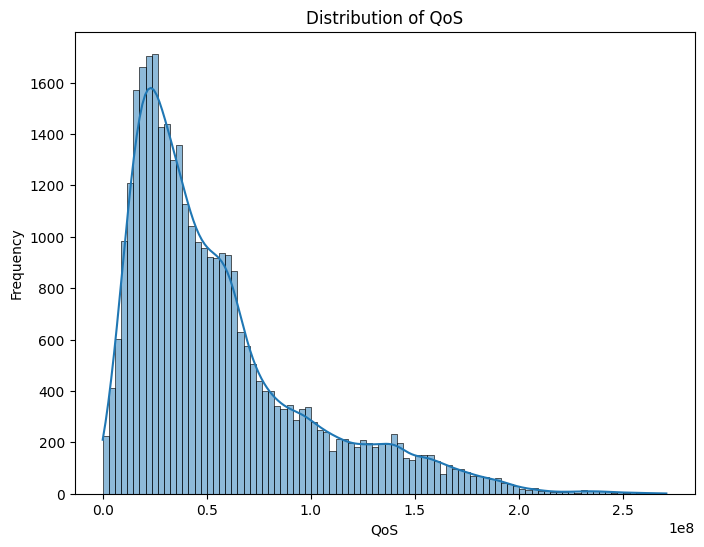

In [ ]:
# Histogram of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x='target', kde=True)
plt.xlabel('QoS')
plt.ylabel('Frequency')
plt.title('Distribution of QoS')
plt.show()


In [ ]:
# Calculate skewness and kurtosis of the target variable
skewness = train_df['target'].skew()
kurtosis = train_df['target'].kurtosis()

# Print the skewness and kurtosis values
print('Skewness:', skewness)
print('Kurtosis:', kurtosis)


Skewness: 1.3930777810793087
Kurtosis: 1.6964092305496377


our target is right skewed

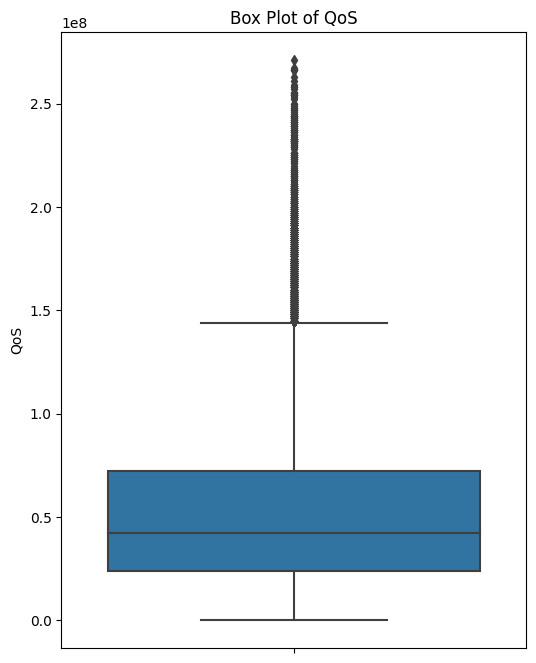

In [ ]:
# Box plot of the target variable
plt.figure(figsize=(6, 8))
sns.boxplot(y=train_df['target'])
plt.ylabel('QoS')
plt.title('Box Plot of QoS')
plt.show()


 create a box plot to visualize the distribution of the target variable and identify potential outliers. we dont have outliers

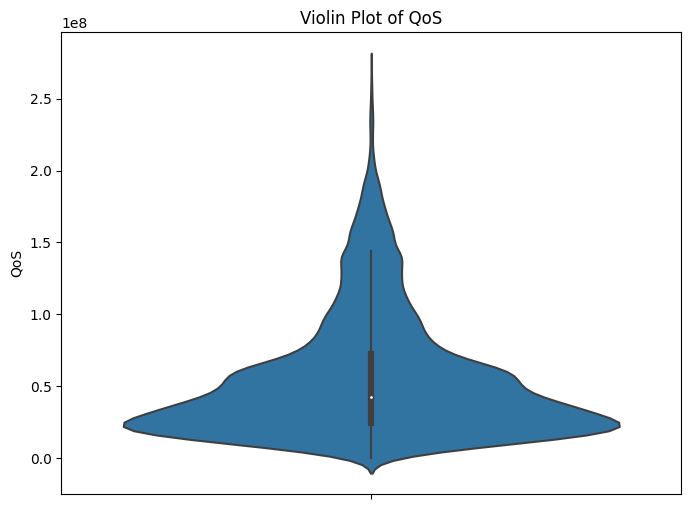

In [ ]:
# Violin plot of the target variable
plt.figure(figsize=(8, 6))
sns.violinplot(y=train_df['target'])
plt.ylabel('QoS')
plt.title('Violin Plot of QoS')
plt.show()


# Bivariate analysis Target variable vs features analysis

In [ ]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Calculate the correlation coefficients
correlation_matrix = train_df.corr()

# Display the correlation coefficients with respect to the target variable
qos_correlations = correlation_matrix['target'].drop('target')
print(qos_correlations)


<ipython-input-33-7d1a8a572188>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


timestamp                       0.200607
PCell_RSRP_max                  0.476838
PCell_RSRQ_max                  0.199297
PCell_RSSI_max                  0.509748
PCell_SNR_max                   0.578254
PCell_Downlink_Num_RBs          0.407318
PCell_Downlink_Average_MCS      0.453623
PCell_Downlink_bandwidth_MHz    0.255724
PCell_Cell_Identity             0.413882
PCell_freq_MHz                 -0.163348
SCell_RSRP_max                  0.499241
SCell_RSRQ_max                  0.290588
SCell_RSSI_max                  0.455739
SCell_SNR_max                   0.643400
SCell_Downlink_Num_RBs          0.483974
SCell_Downlink_Average_MCS      0.628431
SCell_Downlink_bandwidth_MHz    0.020174
SCell_Cell_Identity             0.178154
SCell_freq_MHz                  0.004563
operator                       -0.431571
Latitude                        0.018893
Longitude                       0.063113
Altitude                       -0.065058
speed_kmh                      -0.072416
COG             

Positive Correlation:

Close to 1: A value close to 1 indicates a strong positive correlation. It suggests that as one variable increases, the other variable tends to increase as well.
Close to 0.5 to 0.7: A value between 0.5 and 0.7 indicates a moderate positive correlation.
Close to 0: A value close to 0 suggests a weak positive correlation.
Negative Correlation:

Close to -1: A value close to -1 indicates a strong negative correlation. It suggests that as one variable increases, the other variable tends to decrease.
Close to -0.5 to -0.7: A value between -0.5 and -0.7 indicates a moderate negative correlation.
Close to 0: A value close to 0 suggests a weak negative correlation.
No Correlation:

Close to 0: A value close to 0 suggests no significant linear relationship between the variables. However, it's important to note that there might still be nonlinear relationships or dependencies.

In [ ]:
# Calculate the correlation coefficients
correlation_matrix = train_df.corr()

# Set the correlation threshold for moderate correlation
correlation_threshold = 0.5

# Find the features with correlation above the threshold
moderate_correlation_features = correlation_matrix[abs(correlation_matrix['target']) > correlation_threshold].index.tolist()

# Display the features with moderate correlation
print("Features with moderate correlation (>|0.5|):")
print(moderate_correlation_features)



Features with moderate correlation (>|0.5|):
['PCell_RSSI_max', 'PCell_SNR_max', 'SCell_SNR_max', 'SCell_Downlink_Average_MCS', 'target']


<ipython-input-35-b452d26230bf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


this features are moderately positive correlarated with target variable
1. PCell_RSSI_max'
2. PCell_SNR_max
3. SCell_SNR_max'
4. SCell_Downlink_Average_MCS'

Feature Selection: Highly correlated features can be good candidates for feature selection. You can prioritize these features and include them in your predictive model to improve its performance. However, it's important to consider the context and domain knowledge to ensure the selected features are meaningful and contribute to the understanding of the problem.

Explore Feature Importance: You can further investigate the importance of these highly correlated features by using techniques such as feature importance ranking or permutation importance. These techniques can help identify the relative importance of features in predicting the target variable and guide you in selecting the most influential features.

Multicollinearity Check: Highly correlated features can indicate the presence of multicollinearity, where two or more features are strongly correlated with each other. In such cases, it's important to handle multicollinearity to avoid issues such as inflated coefficient estimates or model instability. Techniques like principal component analysis (PCA) or variance inflation factor (VIF) analysis can be employed to address multicollinearity.

Feature Engineering: Highly correlated features can provide opportunities for feature engineering. You can create new features by combining or transforming the existing ones. For example, you can calculate ratios or differences between highly correlated features to capture additional information or reduce redundancy.

Interpretation and Insights: Understanding the relationship between highly correlated features and the target variable can provide valuable insights into the underlying factors influencing the target. It can help in explaining the patterns or behaviors observed in the data and contribute to a better understanding of the problem at hand.

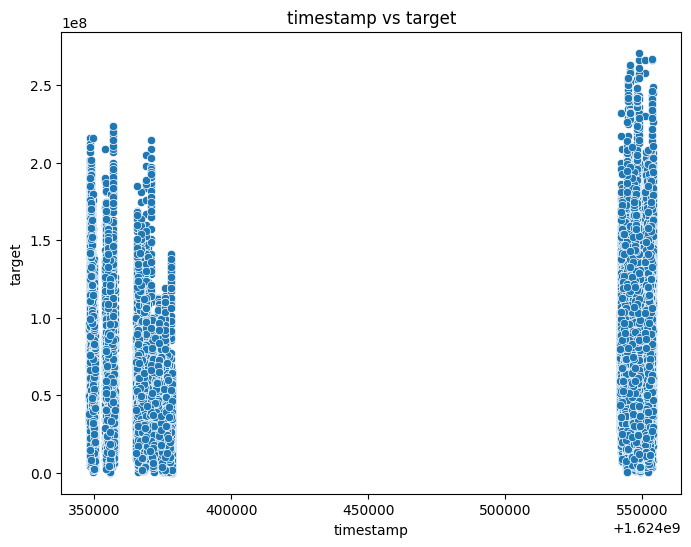

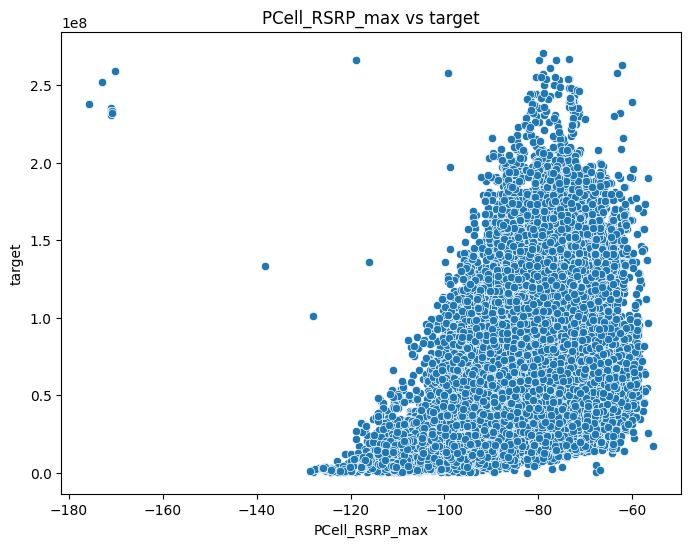

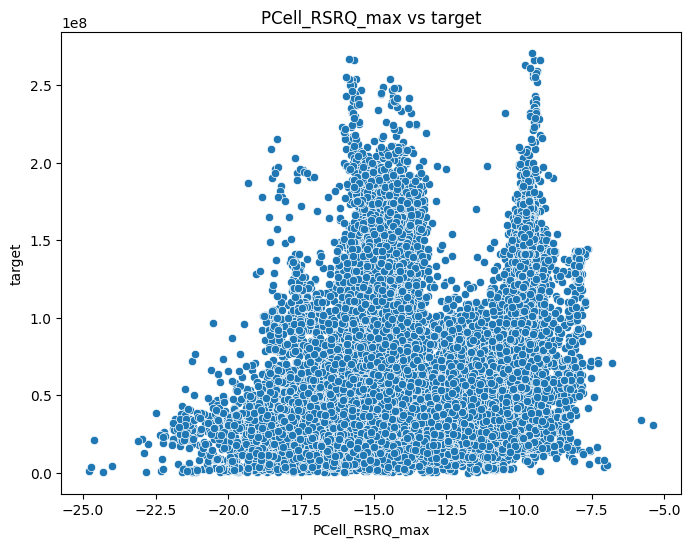

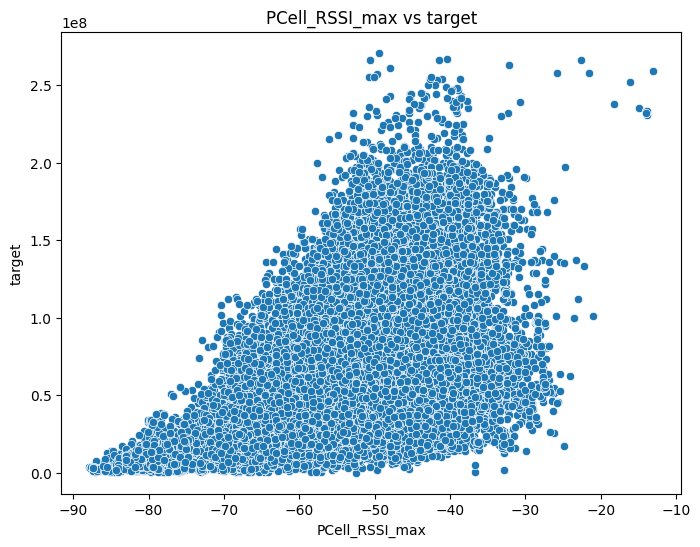

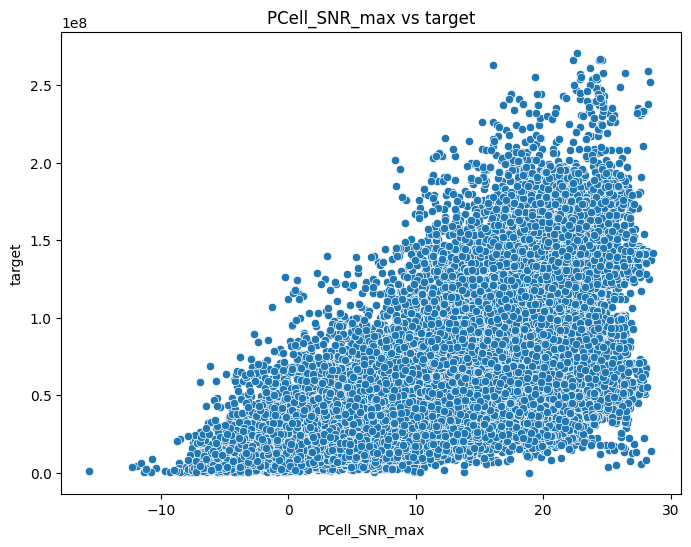

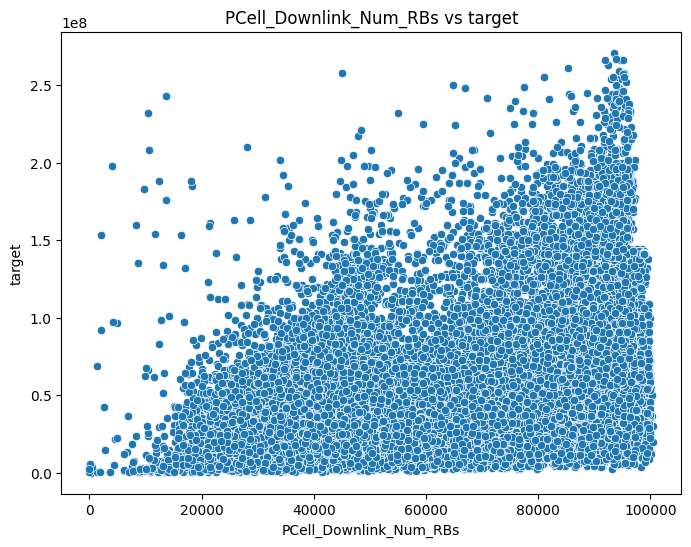

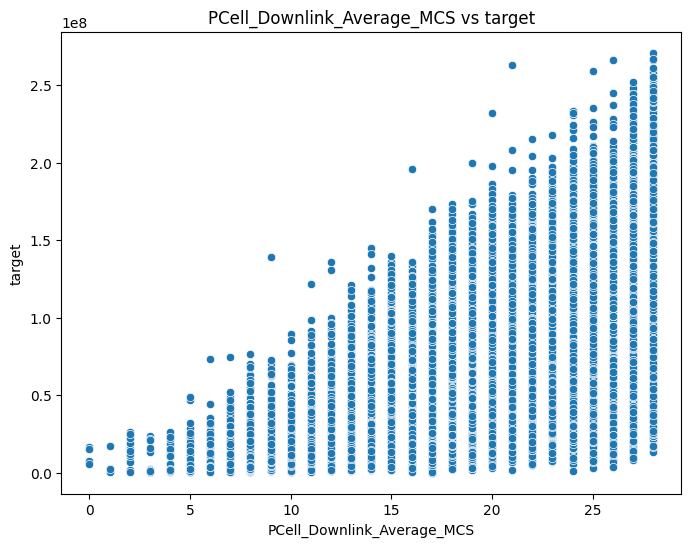

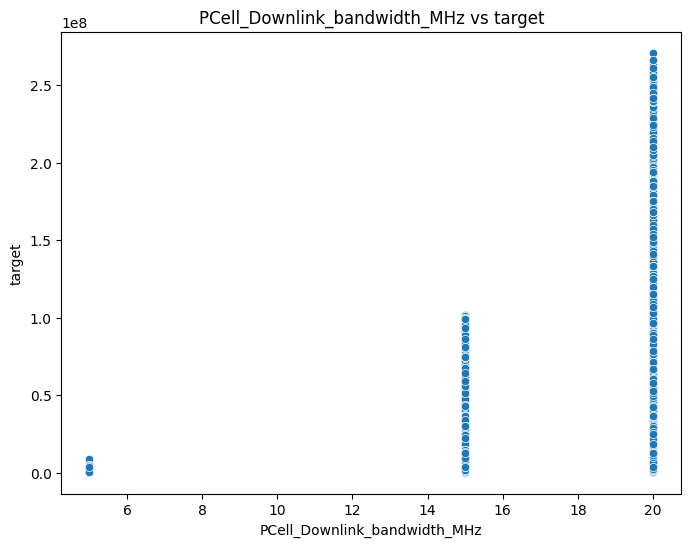

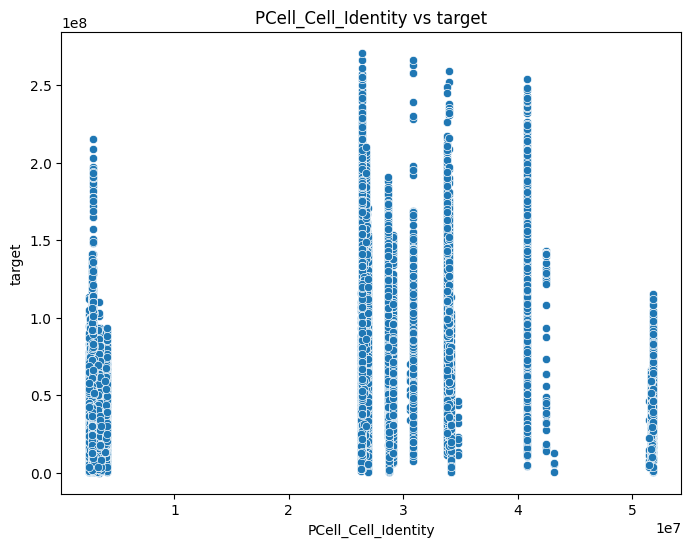

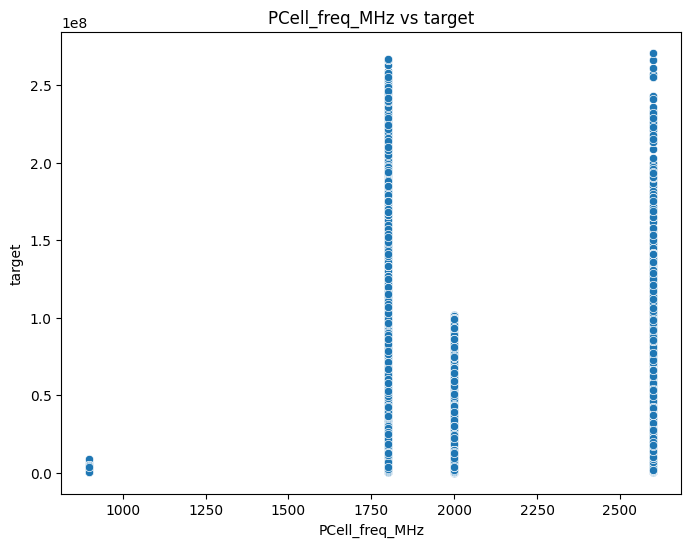

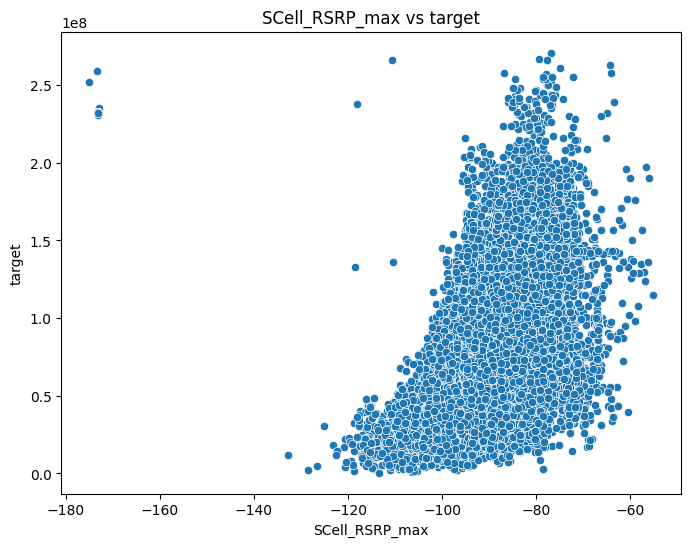

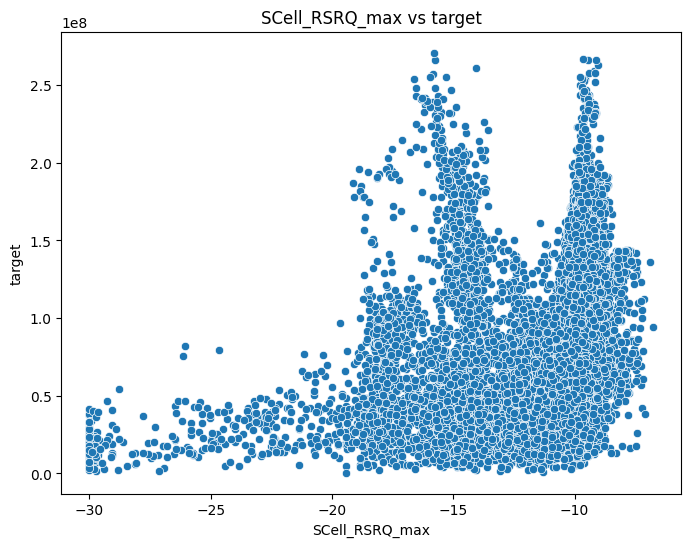

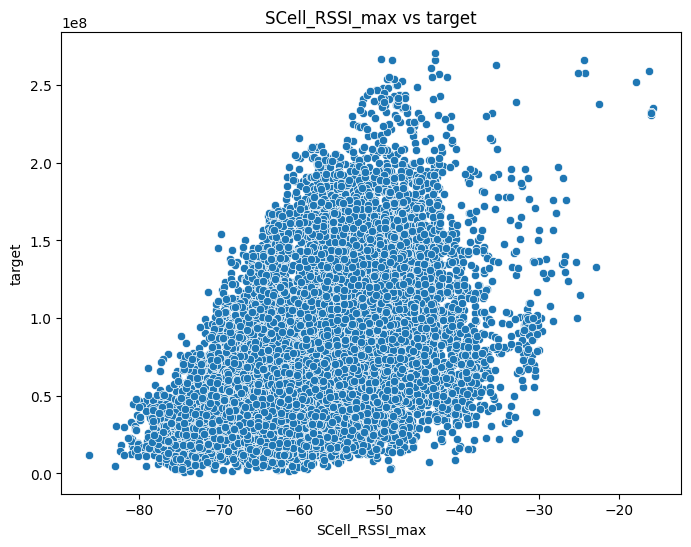

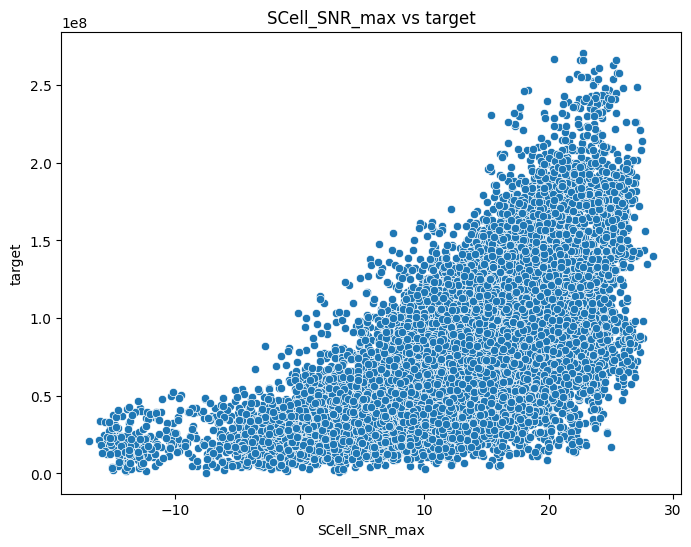

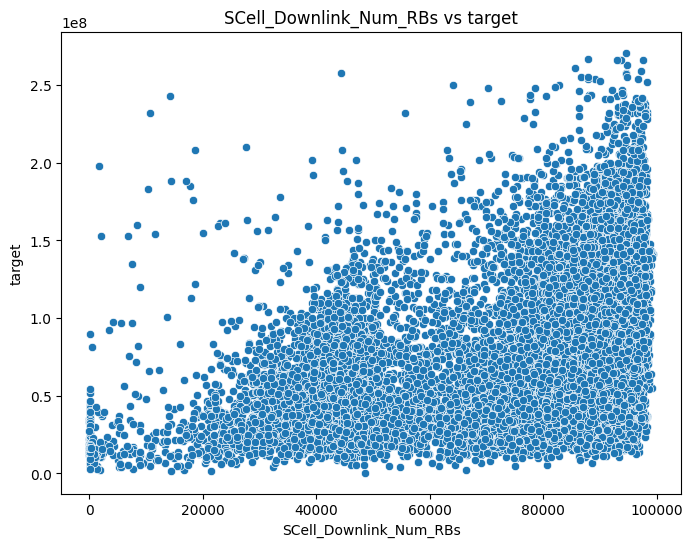

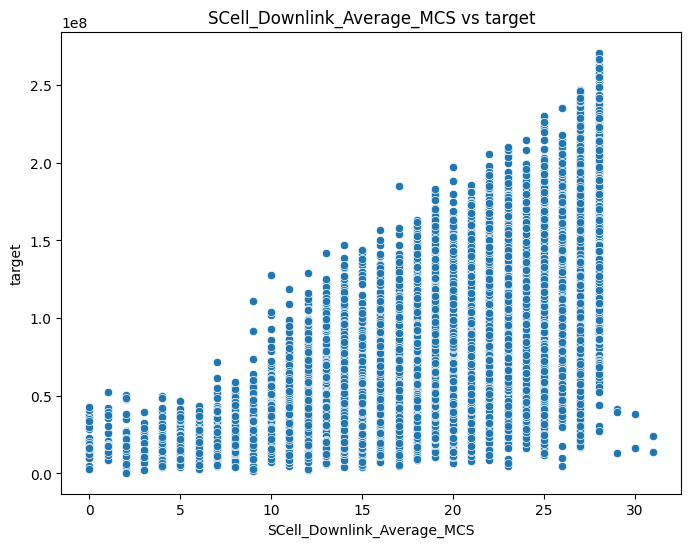

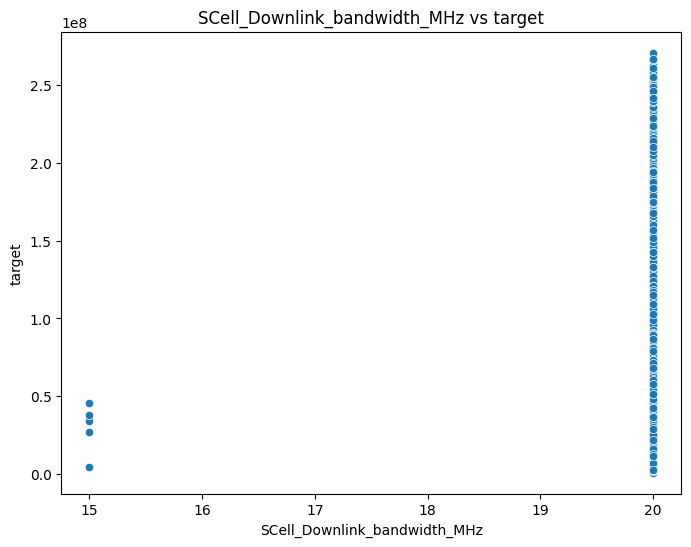

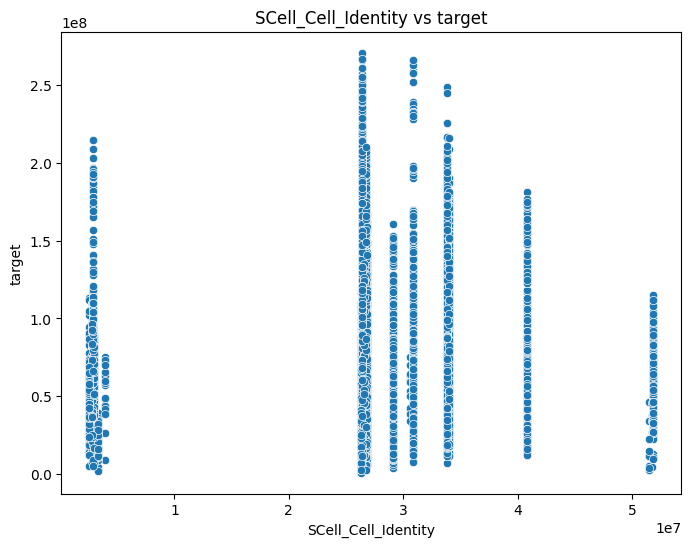

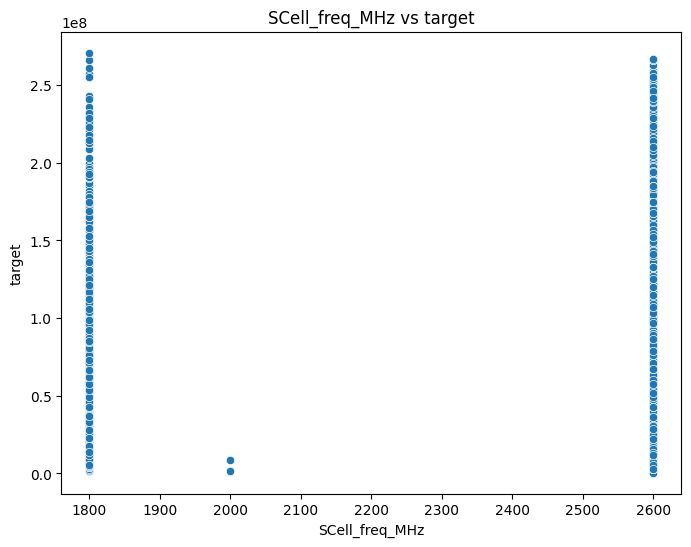

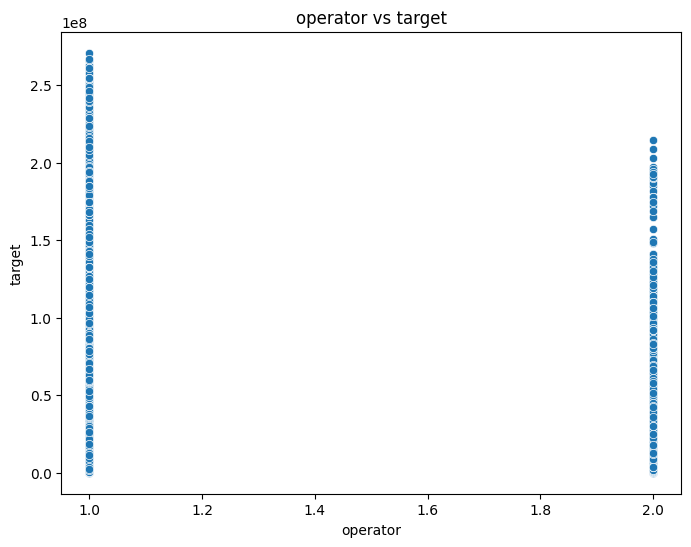

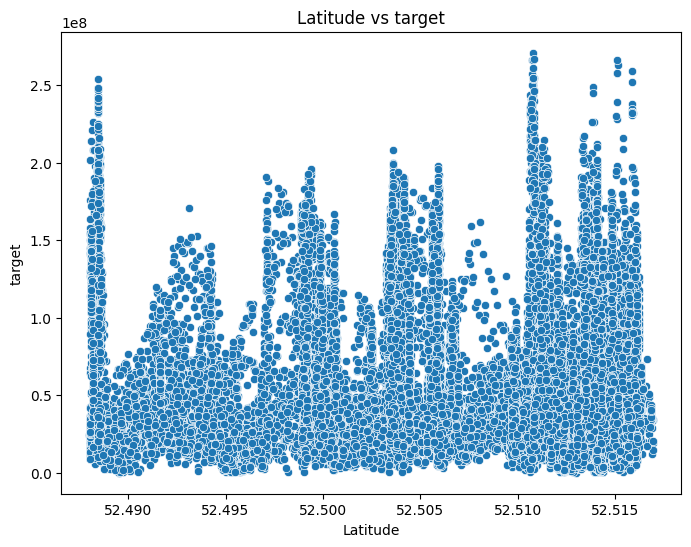

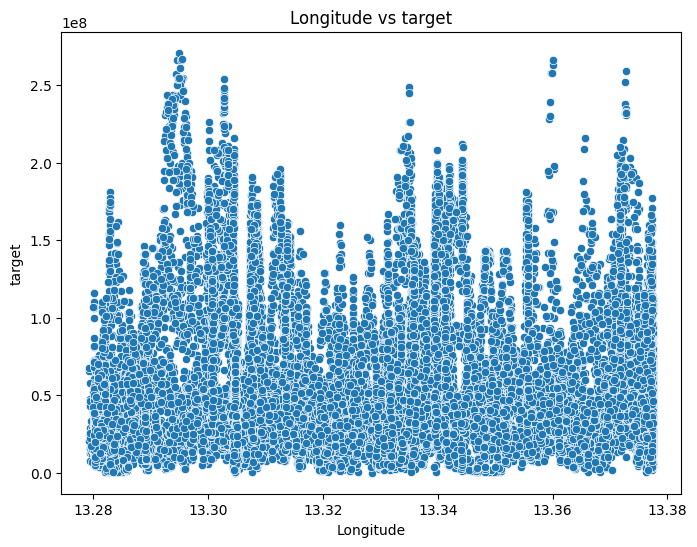

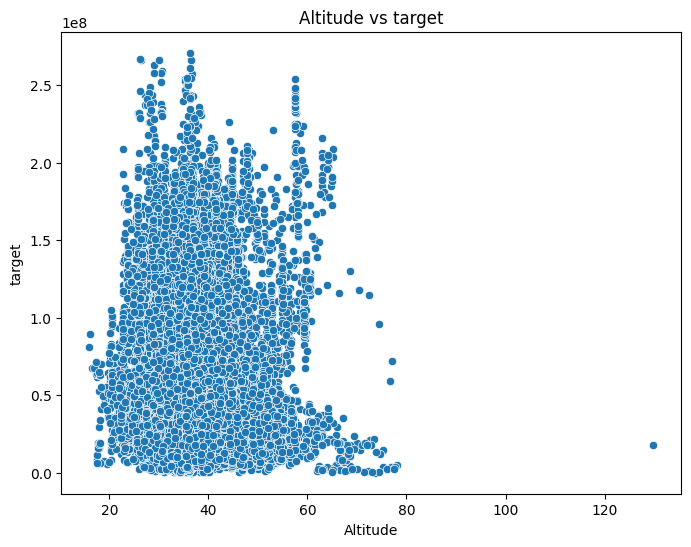

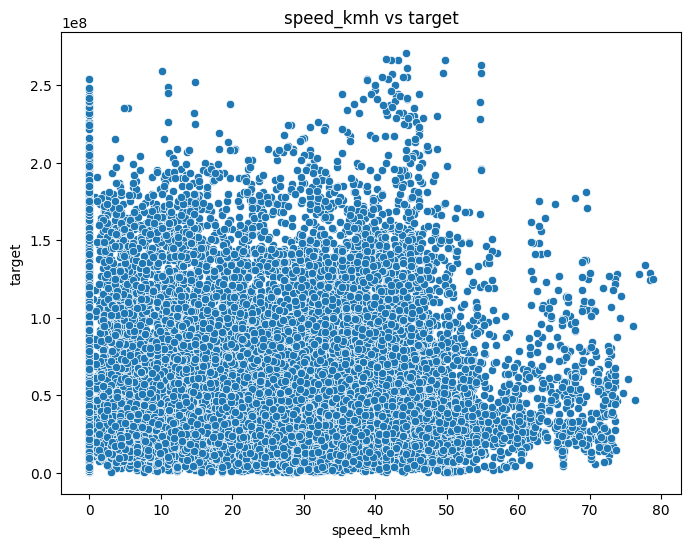

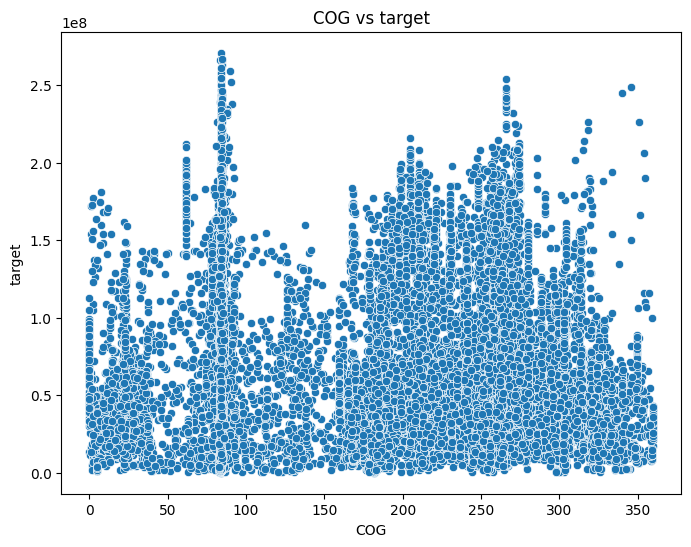

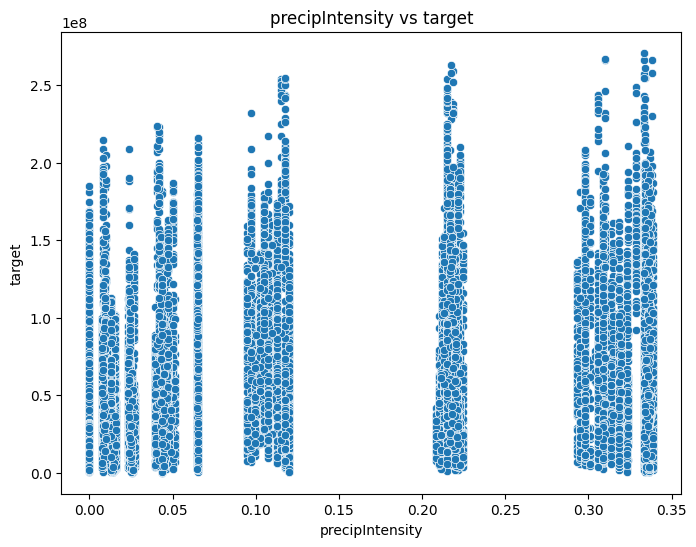

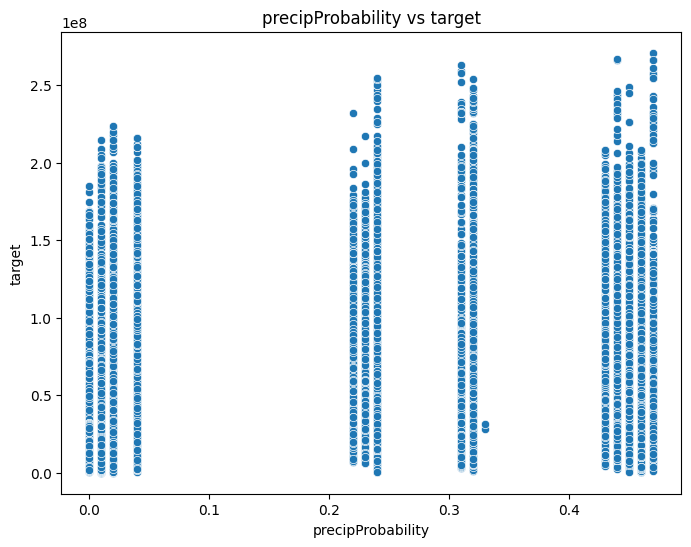

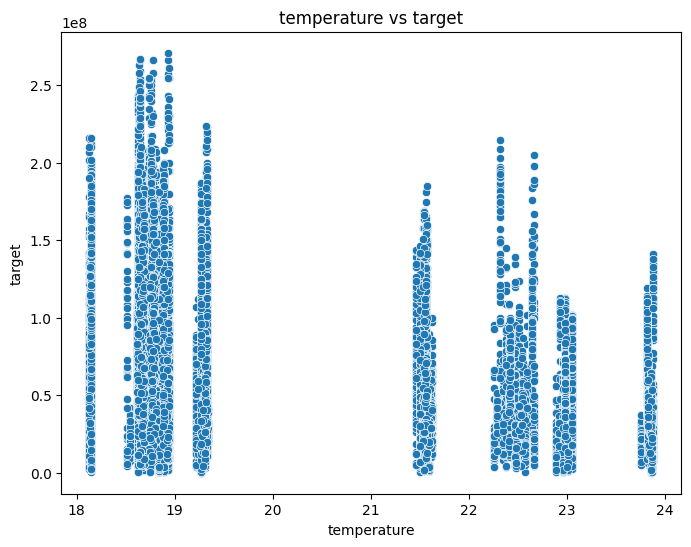

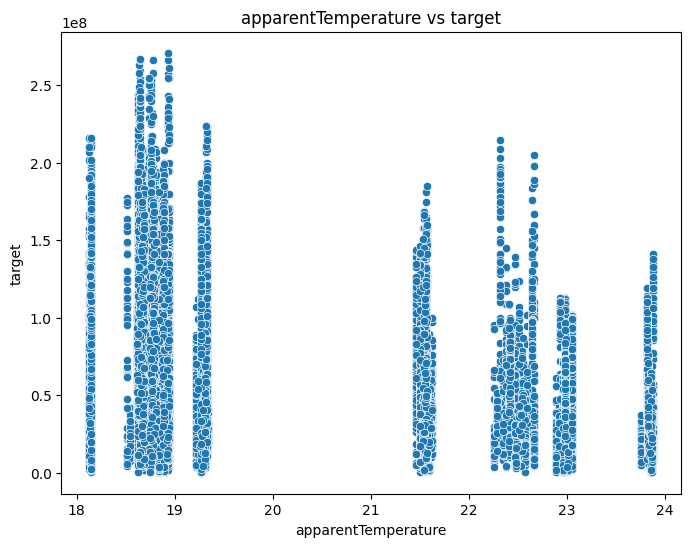

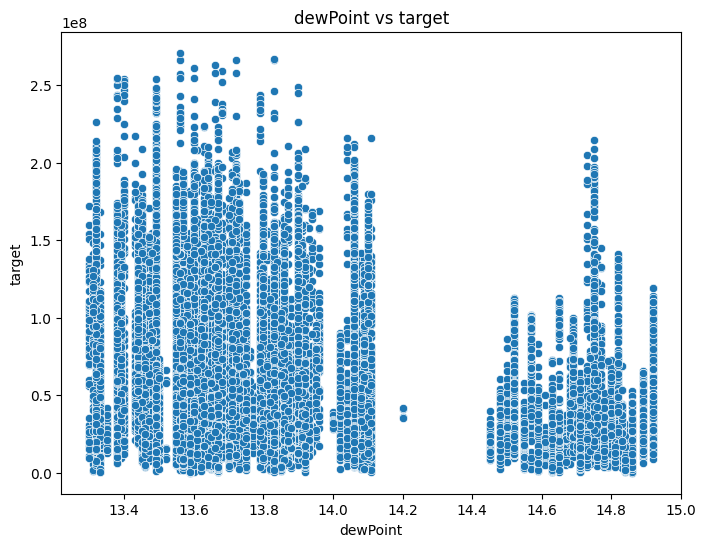

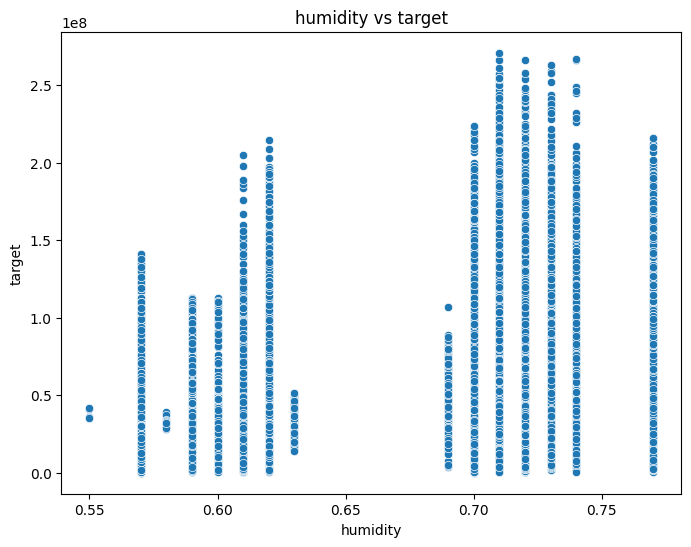

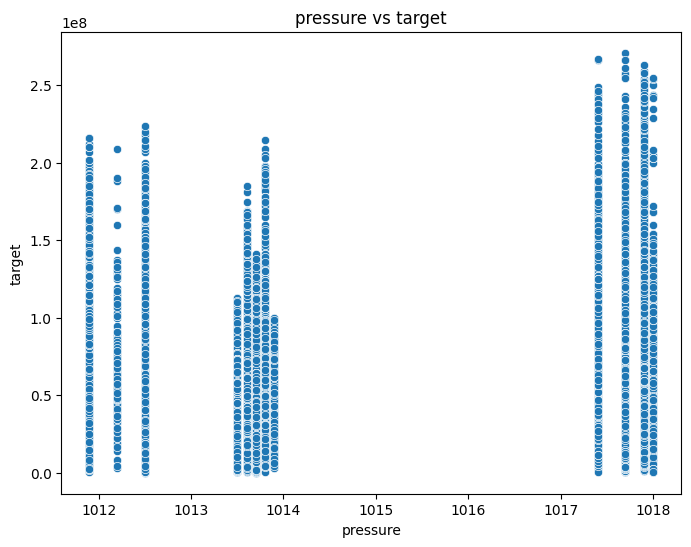

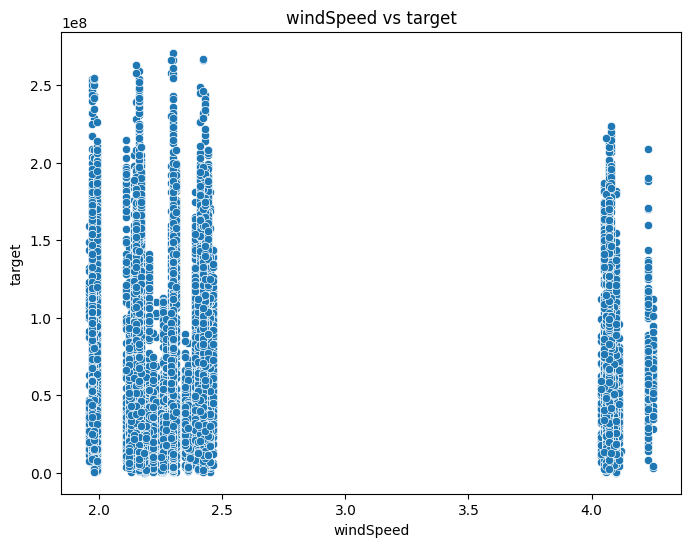

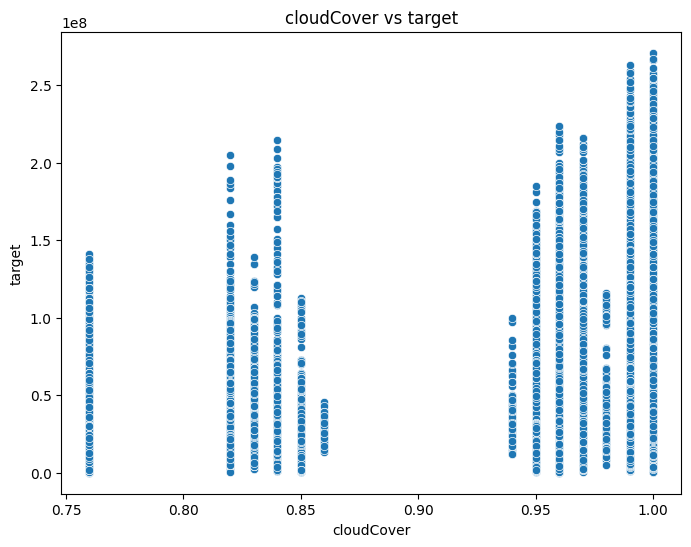

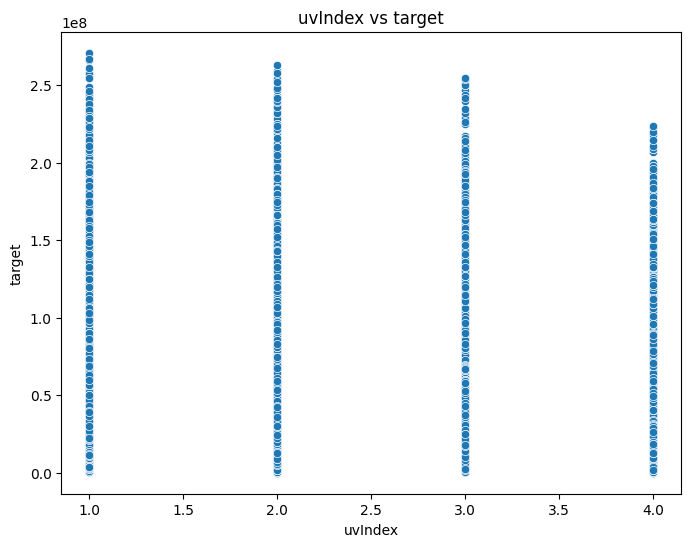

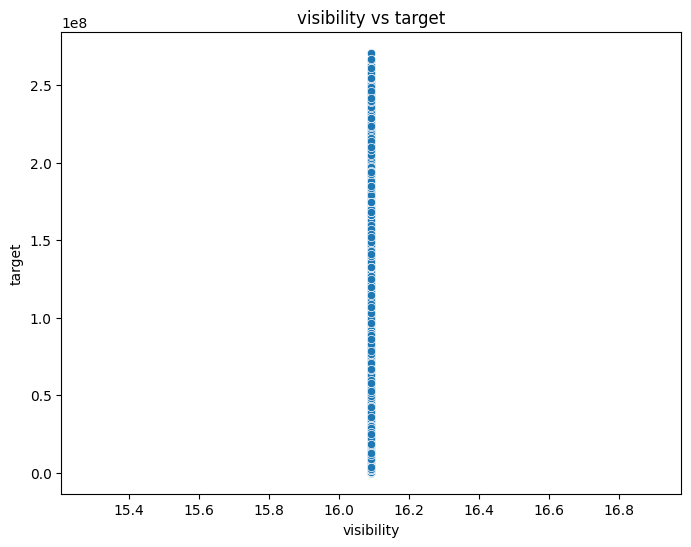

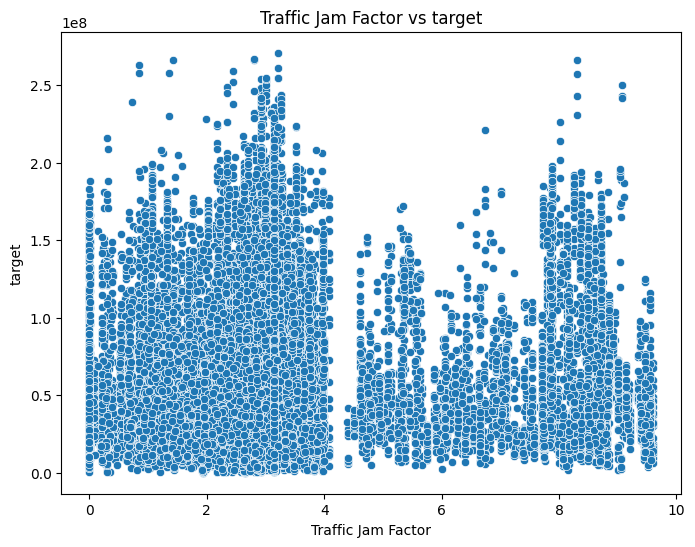

In [ ]:
# Scatter plots of numerical features against the target variable
num_features = ['timestamp', 'PCell_RSRP_max', 'PCell_RSRQ_max', 'PCell_RSSI_max', 'PCell_SNR_max',
             'PCell_Downlink_Num_RBs', 'PCell_Downlink_Average_MCS', 'PCell_Downlink_bandwidth_MHz',
             'PCell_Cell_Identity', 'PCell_freq_MHz', 'SCell_RSRP_max', 'SCell_RSRQ_max', 'SCell_RSSI_max',
             'SCell_SNR_max', 'SCell_Downlink_Num_RBs', 'SCell_Downlink_Average_MCS', 'SCell_Downlink_bandwidth_MHz',
             'SCell_Cell_Identity', 'SCell_freq_MHz', 'operator', 'Latitude', 'Longitude', 'Altitude',
             'speed_kmh', 'COG', 'precipIntensity', 'precipProbability', 'temperature', 'apparentTemperature',
             'dewPoint', 'humidity', 'pressure', 'windSpeed', 'cloudCover', 'uvIndex', 'visibility',
             'Traffic Jam Factor']
for feature in num_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=train_df[feature], y=train_df['target'])
    plt.title(f"{feature} vs target")
    plt.xlabel(feature)
    plt.ylabel("target")
    plt.show()

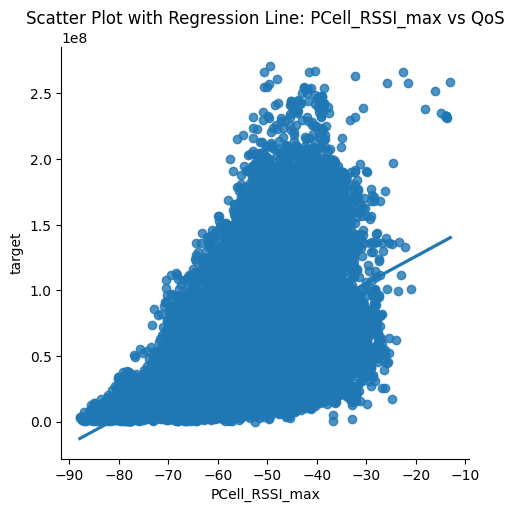

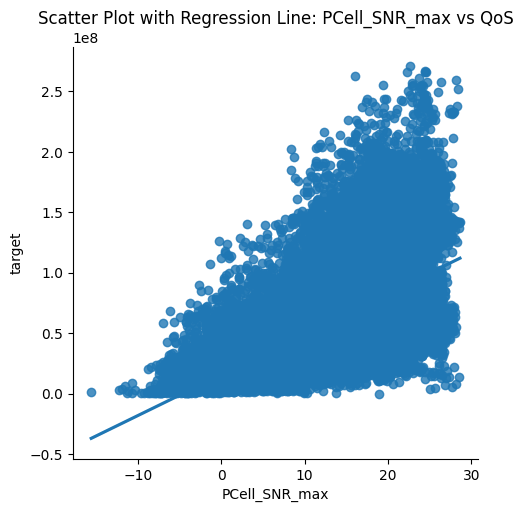

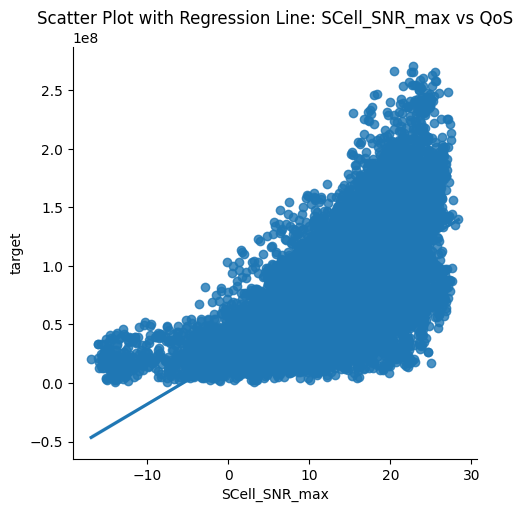

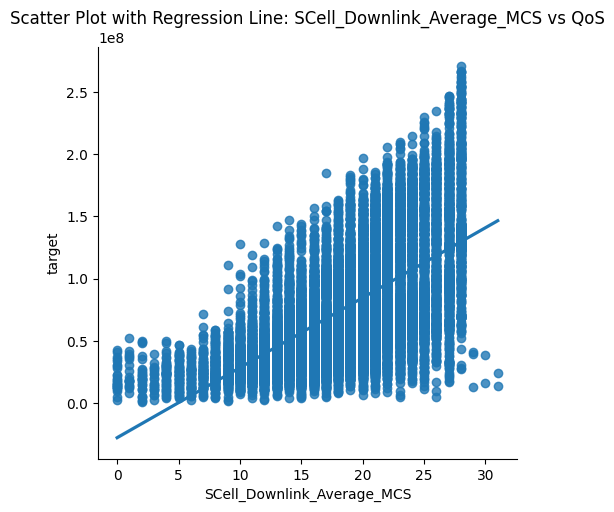

In [ ]:
# Select a few variables to plot against the target variable, i selected the highly correlated to the target
variables = ['PCell_RSSI_max','PCell_SNR_max','SCell_SNR_max','SCell_Downlink_Average_MCS']

# Create scatter plots with regression lines
for variable in variables:
    sns.lmplot(x=variable, y='target', data=train_df)
    plt.title(f'Scatter Plot with Regression Line: {variable} vs QoS')
    plt.show()

# feature-to-feature analysis

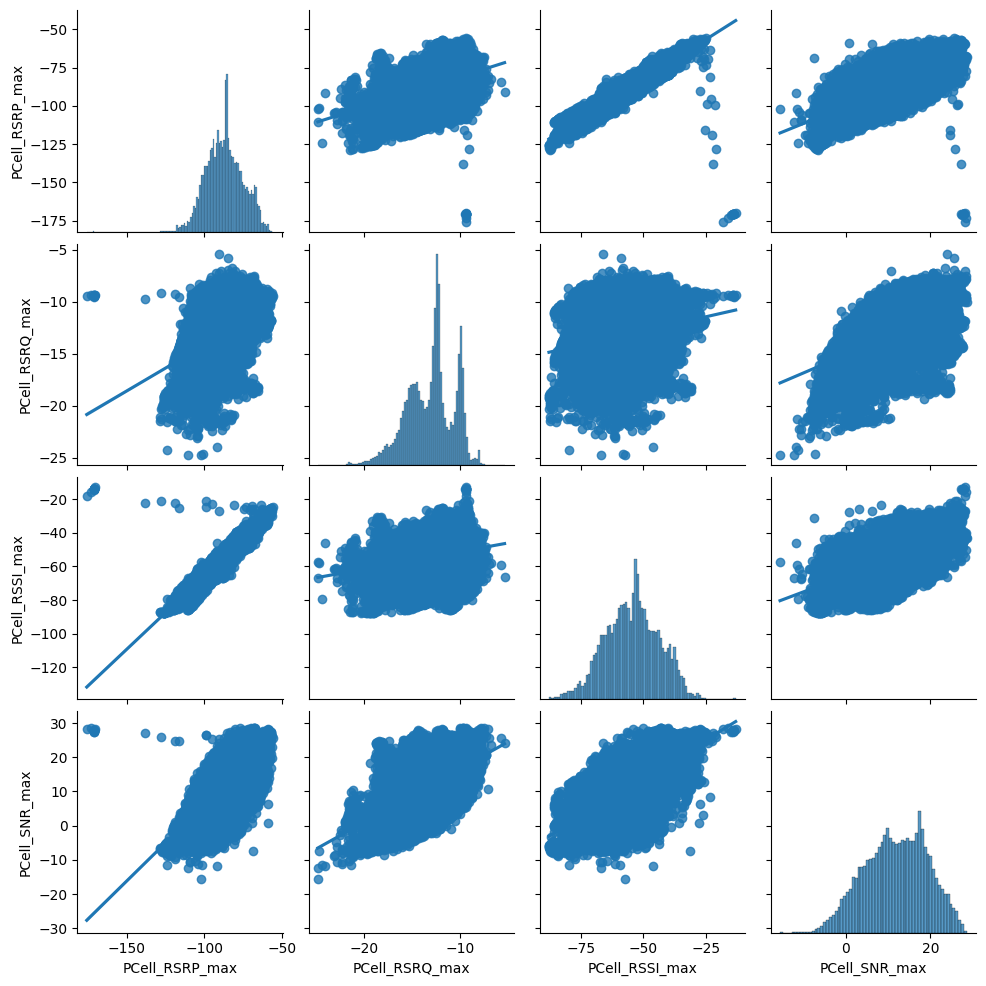

In [ ]:
import seaborn as sns
# Select a few features to analyze against each other
features = ['PCell_RSRP_max', 'PCell_RSRQ_max', 'PCell_RSSI_max', 'PCell_SNR_max']
# Create pairwise plots
sns.pairplot(train_df[features], kind='reg')
plt.show()


In [ ]:
# Select two categorical features to cross-tabulate
feature1 = 'operator'
feature2 = 'device'

# Create a cross-tabulation
cross_tab = pd.crosstab(train_df[feature1], train_df[feature2])

# Display the cross-tabulation
print(cross_tab)

device      pc1    pc3
operator              
1         19505      0
2             0  14769


In [ ]:
# Select the relevant features
selected_features = ['PCell_RSRP_max', 'PCell_RSRQ_max', 'PCell_RSSI_max', 'PCell_SNR_max']

# Calculate the correlation matrix for the selected features
correlation_matrix = train_df[selected_features].corr()

# Print the correlation matrix
print(correlation_matrix)

                PCell_RSRP_max  PCell_RSRQ_max  PCell_RSSI_max  PCell_SNR_max
PCell_RSRP_max        1.000000        0.418942        0.948991       0.705462
PCell_RSRQ_max        0.418942        1.000000        0.237134       0.521783
PCell_RSSI_max        0.948991        0.237134        1.000000       0.650101
PCell_SNR_max         0.705462        0.521783        0.650101       1.000000


CATERGORICAL FEATURES

In [ ]:
# Calculate frequency distribution
frequency = train_df['device'].value_counts()
frequency


pc1    19505
pc3    14769
Name: device, dtype: int64

In [ ]:
# Calculate frequency distribution
unique = train_df['device'].unique()
unique


array(['pc1', 'pc3'], dtype=object)

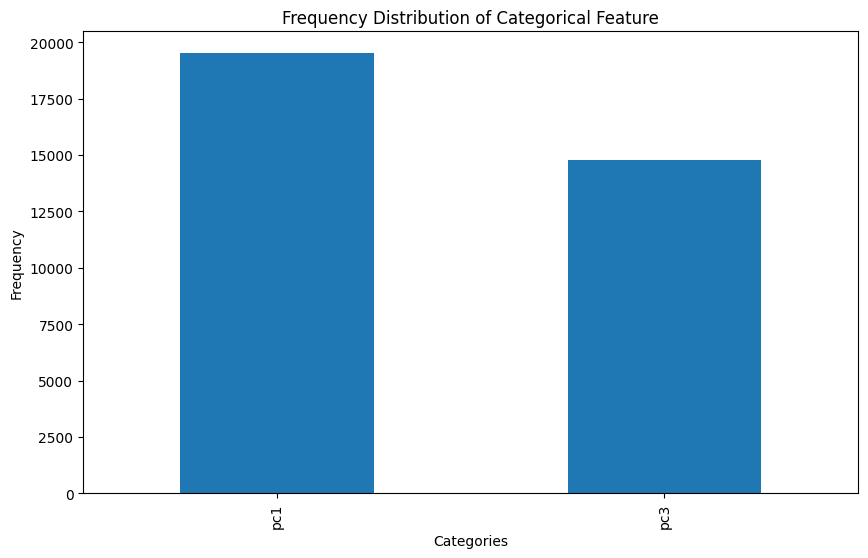

In [ ]:
import matplotlib.pyplot as plt

# Plot the bar chart
plt.figure(figsize=(10, 6))
train_df['device'].value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Categorical Feature')
plt.show()


In [ ]:
# Create cross-tabulation
cross_tab = pd.crosstab(train_df['device'], train_df['target'])

cross_tab

target  48000.0      182000.0     201000.0     230000.0     240000.0     \
device                                                                    
pc1               0            1            0            1            0   
pc3               1            0            1            0            1   

target  269000.0     355000.0     374000.0     423000.0     442000.0     ...  \
device                                                                   ...   
pc1               0            1            1            0            1  ...   
pc3               2            3            0            1            0  ...   

target  254000000.0  255000000.0  257000000.0  258000000.0  259000000.0  \
device                                                                    
pc1               3            3            1            2            1   
pc3               0            0            0            0            0   

target  261000000.0  263000000.0  266000000.0  267000000.0  271000000.0  
device                                                                   
pc1               1            1            3            1            1  
pc3               0            0            0            0            0  

[2 rows x 1789 columns]

In [ ]:
from scipy.stats import chi2_contingency

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(cross_tab)

# Interpret the results
if p_value < 0.05:
    print("There is a significant association between the categorical feature and the target.")
else:
    print("There is no significant association between the categorical feature and the target.")


There is a significant association between the categorical feature and the target.


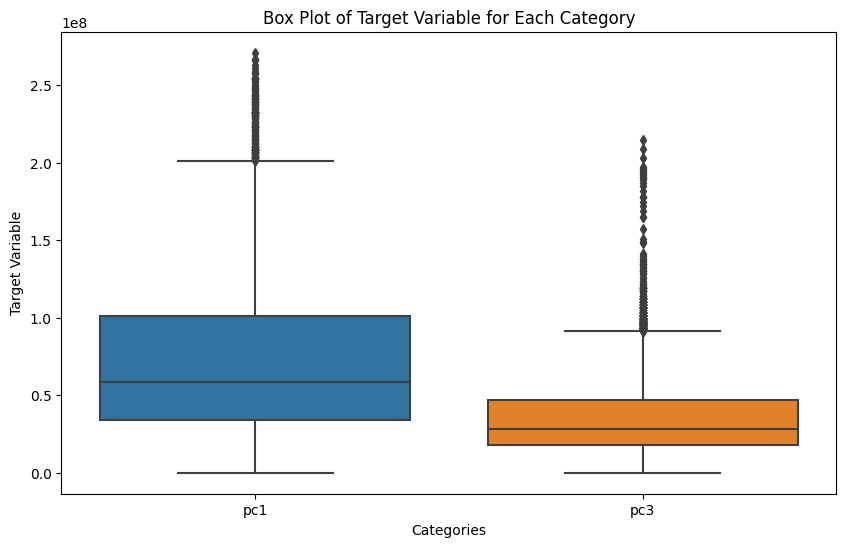

In [ ]:
import seaborn as sns

# Plot box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='device', y='target', data=train_df)
plt.xlabel('Categories')
plt.ylabel('Target Variable')
plt.title('Box Plot of Target Variable for Each Category')
plt.show()


In [ ]:
# Calculate frequency distribution
frequency = train_df['area'].value_counts()
frequency

Park           13438
Residential    10407
Avenue          6889
Highway         3397
Tunnel           143
Name: area, dtype: int64

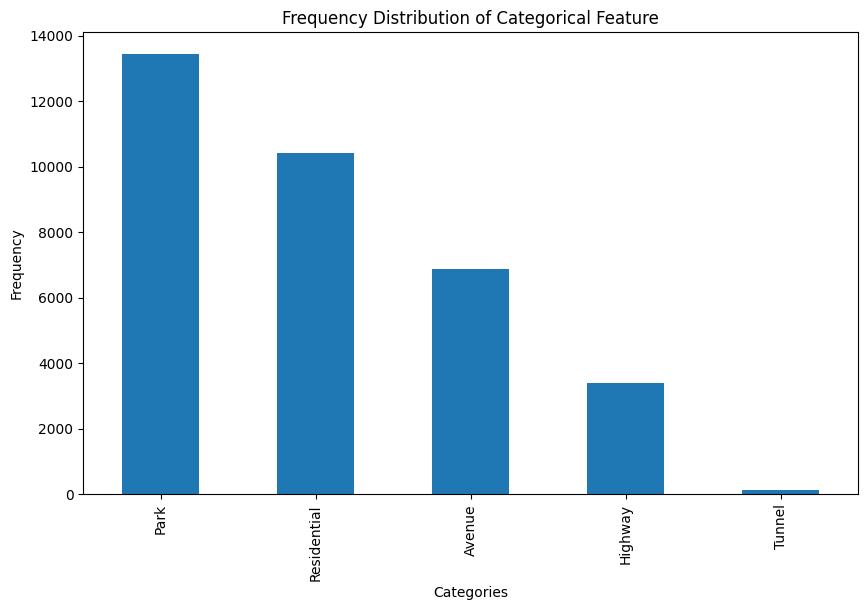

In [ ]:
import matplotlib.pyplot as plt

# Plot the bar chart
plt.figure(figsize=(10, 6))
train_df['area'].value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Categorical Feature')
plt.show()


# DATA PRE-PROCESSING

Handling Missing Values

In [ ]:

# Calculate the missing values for each feature
missing_values = train_df.isnull().sum()
# Calculate the percentage of missing values for each feature
missing_percentage = (missing_values / len(train_df)) * 100
# Create a DataFrame to store the missing values and percentages
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
# Sort the DataFrame in descending order of missing percentage
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
# Print the missing values and percentages
print(missing_data)


                              Missing Values  Missing Percentage
SCell_Cell_Identity                    20849           60.830367
SCell_Downlink_bandwidth_MHz           20849           60.830367
SCell_Downlink_Average_MCS             15939           46.504639
SCell_Downlink_Num_RBs                 15939           46.504639
SCell_freq_MHz                         15262           44.529381
SCell_RSRP_max                         15262           44.529381
SCell_SNR_max                          15262           44.529381
SCell_RSSI_max                         15262           44.529381
SCell_RSRQ_max                         15262           44.529381
PCell_Downlink_bandwidth_MHz            1067            3.113147
PCell_Cell_Identity                     1067            3.113147
Traffic Jam Factor                       328            0.956994
Altitude                                   7            0.020424
precipProbability                          0            0.000000
temperature              

In [ ]:
# Calculate the missing values for each feature
missing_values = test_df.isnull().sum()
# Calculate the percentage of missing values for each feature
missing_percentage = (missing_values / len(test_df)) * 100
# Create a DataFrame to store the missing values and percentages
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
# Sort the DataFrame in descending order of missing percentage
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
# Print the missing values and percentages
print(missing_data)

                              Missing Values  Missing Percentage
id                                         0                 0.0
timestamp                                  0                 0.0
Latitude                                   0                 0.0
Longitude                                  0                 0.0
Altitude                                   0                 0.0
speed_kmh                                  0                 0.0
COG                                        0                 0.0
precipIntensity                            0                 0.0
precipProbability                          0                 0.0
temperature                                0                 0.0
apparentTemperature                        0                 0.0
dewPoint                                   0                 0.0
humidity                                   0                 0.0
pressure                                   0                 0.0
windSpeed                

In [ ]:
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

In [ ]:
# Impute missing values in Traffic Jam Factor using mean
train_df['Traffic Jam Factor'].fillna(train_df['Traffic Jam Factor'].mean(), inplace=True)
# Impute missing values in Altitude using median
train_df['Altitude'].fillna(train_df['Altitude'].median(), inplace=True)


# Impute missing values in Traffic Jam Factor using mean
test_df['Traffic Jam Factor'].fillna(train_df['Traffic Jam Factor'].mean(), inplace=True)
# Impute missing values in Altitude using median
test_df['Altitude'].fillna(train_df['Altitude'].median(), inplace=True)


# Impute missing values in Traffic Jam Factor using mean
test_df['PCell_Downlink_Average_MCS'].fillna(test_df['PCell_Downlink_Average_MCS'].median(), inplace=True)
# Impute missing values in Altitude using median
test_df['PCell_Downlink_Num_RBs'].fillna(test_df['PCell_Downlink_Num_RBs'].median(), inplace=True)


# Impute missing values in Altitude using median
train_df['PCell_Cell_Identity'].fillna(train_df['PCell_Cell_Identity'].median(), inplace=True)
# Impute missing values in Altitude using median
train_df['PCell_Downlink_bandwidth_MHz'].fillna(train_df['PCell_Downlink_bandwidth_MHz'].median(), inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# Impute missing values in features with high missing percentages
high_missing_features = ['SCell_Cell_Identity', 'SCell_Downlink_bandwidth_MHz', 'SCell_Downlink_Average_MCS',
                         'SCell_Downlink_Num_RBs', 'SCell_freq_MHz', 'SCell_RSRP_max', 'SCell_SNR_max',
                         'SCell_RSSI_max', 'SCell_RSRQ_max','PCell_Cell_Identity','PCell_Downlink_bandwidth_MHz']

#train_df[high_missing_features] = imputer.fit_transform(train_df[high_missing_features])
#test_df[high_missing_features] = imputer.fit_transform(test_df[high_missing_features])


In [ ]:
# Transform categorical features
categorical_features = ['area']
oe = OrdinalEncoder()
train_df[categorical_features] = oe.fit_transform(train_df[categorical_features])
test_df[categorical_features] = oe.transform(test_df[categorical_features])


In [ ]:
# Perform one-hot encoding on 'device' feature
device_encoded = pd.get_dummies(train_df['device'], prefix='device')

# Concatenate the encoded features back to the original dataframe
train_df_encoded = pd.concat([train_df,device_encoded], axis=1)
# Concatenate the encoded features back to the original dataframe
test_df_encoded = pd.concat([test_df,device_encoded], axis=1)


In [ ]:
train_df=train_df_encoded
test_df=test_df_encoded

In [ ]:
train_df.head()

id   timestamp device  PCell_RSRP_max  PCell_RSRQ_max  \
0  Id_qt2qn56050  1624367008    pc1      -84.498750      -14.586875   
1  Id_f1zf07cwb6  1624372465    pc3      -86.818125      -11.982500   
2  Id_uoxdz7di5b  1624371871    pc3     -101.916250      -13.257500   
3  Id_hzn8nj29gu  1624542066    pc1      -95.598750      -14.696250   
4  Id_2kfrccrfiw  1624542798    pc1      -97.735000      -14.867500   

   PCell_RSSI_max  PCell_SNR_max  PCell_Downlink_Num_RBs  \
0      -49.855625         16.457                 35076.0   
1      -54.838125         16.674                 42704.0   
2      -71.241250          9.392                 36017.0   
3      -61.660000         10.726                 95955.0   
4      -63.170625         10.889                 83062.0   

   PCell_Downlink_Average_MCS  PCell_Downlink_bandwidth_MHz  ...  dewPoint  \
0                        23.0                          20.0  ...     13.86   
1                        24.0                          20.0  ...     14.52   
2                        22.0                          20.0  ...     14.71   
3                        17.0                          20.0  ...     13.43   
4                        19.0                          20.0  ...     13.46   

   humidity  pressure  windSpeed  cloudCover  uvIndex  visibility  \
0      0.62    1013.6       2.39        0.95      4.0      16.093   
1      0.59    1013.5       2.29        0.82      3.0      16.093   
2      0.61    1013.8       2.13        0.82      3.0      16.093   
3      0.71    1017.9       1.97        0.99      3.0      16.093   
4      0.71    1017.9       1.97        0.99      3.0      16.093   

   Traffic Jam Factor  area      target  
0             0.38979   3.0  51500000.0  
1             3.78322   3.0  50300000.0  
2             2.08425   3.0  16500000.0  
3             8.80702   0.0  46400000.0  
4             2.21843   2.0  50200000.0  

[5 rows x 41 columns]

In [ ]:
test_df.head()

id   timestamp device  PCell_RSRP_max  PCell_RSRQ_max  \
0  Id_ln0e0hfrgx  1624374179    pc2      -97.121875      -12.923750   
1  Id_svf7nz9fxv  1624366264    pc4      -65.202500       -9.944375   
2  Id_ww2mh07gwj  1624375795    pc2      -79.298125      -17.468750   
3  Id_v88r4y03ww  1624374065    pc2     -110.128125      -13.513750   
4  Id_2u4y4kzglh  1624374361    pc2     -117.451250      -18.753125   

   PCell_RSSI_max  PCell_SNR_max  PCell_Downlink_Num_RBs  \
0      -87.554375         13.293                 39276.0   
1      -35.501875         21.823                 39566.0   
2      -74.823750         24.114                 41900.0   
3      -92.566875          6.282                 76310.0   
4      -93.048125         -5.767                 44887.0   

   PCell_Downlink_Average_MCS  PCell_Downlink_bandwidth_MHz  ...  \
0                        24.0                            20  ...   
1                        25.0                            20  ...   
2                        27.0                            20  ...   
3                        18.0                            20  ...   
4                         7.0                            20  ...   

   apparentTemperature  dewPoint  humidity  pressure  windSpeed  cloudCover  \
0                23.05     14.55      0.59    1013.6       2.27        0.83   
1                21.56     13.92      0.62    1013.6       2.42        0.95   
2                22.93     14.65      0.60    1013.5       2.26        0.85   
3                22.95     14.45      0.59    1013.6       2.27        0.82   
4                23.05     14.55      0.59    1013.6       2.27        0.83   

   uvIndex  visibility  Traffic Jam Factor  area  
0      3.0      16.093             3.07702   0.0  
1      4.0      16.093             0.66000   2.0  
2      3.0      16.093             2.49330   2.0  
3      3.0      16.093             5.74454   1.0  
4      3.0      16.093             3.48651   0.0  

[5 rows x 40 columns]

In [ ]:
# Split inputs and targets
train_inputs = train_df.drop(columns=['target'])
train_targets = train_df['target']
test_inputs = test_df.copy()

# Select features
dropped_columns = ['device', 'id']
train_inputs.drop(columns=dropped_columns, inplace=True)
test_inputs.drop(columns=dropped_columns, inplace=True)

In [ ]:
train_inputs

timestamp  PCell_RSRP_max  PCell_RSRQ_max  PCell_RSSI_max  \
0      1624367008      -84.498750      -14.586875      -49.855625   
1      1624372465      -86.818125      -11.982500      -54.838125   
2      1624371871     -101.916250      -13.257500      -71.241250   
3      1624542066      -95.598750      -14.696250      -61.660000   
4      1624542798      -97.735000      -14.867500      -63.170625   
...           ...             ...             ...             ...   
34269  1624354061      -72.789375      -10.436875      -43.340625   
34270  1624349993      -86.219375      -12.911875      -56.473750   
34271  1624377135      -85.964375      -13.278750      -51.610000   
34272  1624542859      -92.546250      -14.460625      -58.441875   
34273  1624376571      -97.323125      -13.153125      -63.145000   

       PCell_SNR_max  PCell_Downlink_Num_RBs  PCell_Downlink_Average_MCS  \
0             16.457                 35076.0                        23.0   
1             16.674                 42704.0                        24.0   
2              9.392                 36017.0                        22.0   
3             10.726                 95955.0                        17.0   
4             10.889                 83062.0                        19.0   
...              ...                     ...                         ...   
34269          6.342                 96320.0                        16.0   
34270         13.201                 45069.0                        27.0   
34271         11.295                 33942.0                        19.0   
34272         13.096                 87065.0                        20.0   
34273          7.869                 50346.0                        20.0   

       PCell_Downlink_bandwidth_MHz  PCell_Cell_Identity  PCell_freq_MHz  ...  \
0                              20.0           26368258.0          1800.0  ...   
1                              20.0            2568970.0          1800.0  ...   
2                              20.0            2824458.0          1800.0  ...   
3                              20.0           26367489.0          1800.0  ...   
4                              20.0           26369024.0          1800.0  ...   
...                             ...                  ...             ...  ...   
34269                          20.0           34007040.0          1800.0  ...   
34270                          20.0            4078345.0          1800.0  ...   
34271                          20.0            2826249.0          1800.0  ...   
34272                          20.0           26369024.0          1800.0  ...   
34273                          20.0            2824456.0          1800.0  ...   

       apparentTemperature  dewPoint  humidity  pressure  windSpeed  \
0                    21.56     13.86      0.62    1013.6       2.39   
1                    22.98     14.52      0.59    1013.5       2.29   
2                    22.57     14.71      0.61    1013.8       2.13   
3                    18.77     13.43      0.71    1017.9       1.97   
4                    18.79     13.46      0.71    1017.9       1.97   
...                    ...       ...       ...       ...        ...   
34269                18.78     13.90      0.73    1012.2       4.23   
34270                18.15     14.06      0.77    1011.9       4.07   
34271                23.83     14.76      0.57    1013.7       2.22   
34272                18.77     13.44      0.71    1017.9       1.97   
34273                23.85     14.81      0.57    1013.7       2.18   

       cloudCover  uvIndex  visibility  Traffic Jam Factor  area  
0            0.95      4.0      16.093             0.38979   3.0  
1            0.82      3.0      16.093             3.78322   3.0  
2            0.82      3.0      16.093             2.08425   3.0  
3            0.99      3.0      16.093             8.80702   0.0  
4            0.99      3.0      16.093             2.21843   2.0  
...           ...      ...         ...

In [ ]:
test_inputs

timestamp  PCell_RSRP_max  PCell_RSRQ_max  PCell_RSSI_max  \
0      1624374179      -97.121875      -12.923750      -87.554375   
1      1624366264      -65.202500       -9.944375      -35.501875   
2      1624375795      -79.298125      -17.468750      -74.823750   
3      1624374065     -110.128125      -13.513750      -92.566875   
4      1624374361     -117.451250      -18.753125      -93.048125   
...           ...             ...             ...             ...   
18238  1624370207      -81.506250       -9.556875      -78.813125   
18239  1624371137      -84.858750      -12.547500      -83.305000   
18240  1624376766      -82.406875      -12.343125      -79.631875   
18241  1624353986      -95.212500      -10.181875      -65.595625   
18242  1624369388     -103.098125      -15.954375      -67.630625   

       PCell_SNR_max  PCell_Downlink_Num_RBs  PCell_Downlink_Average_MCS  \
0             13.293                 39276.0                        24.0   
1             21.823                 39566.0                        25.0   
2             24.114                 41900.0                        27.0   
3              6.282                 76310.0                        18.0   
4             -5.767                 44887.0                         7.0   
...              ...                     ...                         ...   
18238         24.005                 49881.0                        28.0   
18239         11.985                 29323.0                        22.0   
18240         12.719                 37837.0                        21.0   
18241         11.800                 47277.0                        15.0   
18242          8.063                 44972.0                        11.0   

       PCell_Downlink_bandwidth_MHz  PCell_Cell_Identity  PCell_freq_MHz  ...  \
0                                20            3499534.0          2600.0  ...   
1                                20           26358784.0          1800.0  ...   
2                                20            2843400.0          1800.0  ...   
3                                20            3499534.0          2600.0  ...   
4                                20            3282957.0          2600.0  ...   
...                             ...                  ...             ...  ...   
18238                            20            4000013.0          2600.0  ...   
18239                            20            2940680.0          1800.0  ...   
18240                            20            2824458.0          1800.0  ...   
18241                            20           34006528.0          1800.0  ...   
18242                            20           33802241.0          1800.0  ...   

       apparentTemperature  dewPoint  humidity  pressure  windSpeed  \
0                    23.05     14.55      0.59    1013.6       2.27   
1                    21.56     13.92      0.62    1013.6       2.42   
2                    22.93     14.65      0.60    1013.5       2.26   
3                    22.95     14.45      0.59    1013.6       2.27   
4                    23.05     14.55      0.59    1013.6       2.27   
...                    ...       ...       ...       ...        ...   
18238                22.38     14.77      0.62    1013.8       2.12   
18239                22.42     14.69      0.62    1013.9       2.12   
18240                23.87     14.78      0.57    1013.7       2.19   
18241                18.80     13.92      0.73    1012.2       4.23   
18242                22.41     14.75      0.62    1013.8       2.12   

       cloudCover  uvIndex  visibility  Traffic Jam Factor  area  
0            0.83      3.0      16.093             3.07702   0.0  
1            0.95      4.0      16.093             0.66000   2.0  
2            0.85      3.0      16.093             2.49330   2.0  
3            0.82      3.0      16.093             5.74454   1.0  
4            0.83      3.0      16.093             3.48651   0.0  
...           ...      ...         ...

FEATURE ENGINEERING

In [ ]:
# Create network-related features
train_inputs['PCell_signal_agg'] = train_inputs[['PCell_RSRP_max', 'PCell_RSRQ_max', 'PCell_RSSI_max', 'PCell_SNR_max']].max(axis=1)
train_inputs['SCell_signal_agg'] = train_inputs[['SCell_RSRP_max', 'SCell_RSRQ_max', 'SCell_RSSI_max', 'SCell_SNR_max']].max(axis=1)
train_inputs['signal_diff'] = train_inputs['PCell_signal_agg'] - train_inputs['SCell_signal_agg']
train_inputs['SINR'] = train_inputs['PCell_RSRP_max'] / train_inputs['PCell_RSRQ_max']
# Calculate the SINR (Signal-to-Interference-plus-Noise Ratio)
#train_inputs['SINR'] = np.where(train_inputs['PCell_RSRQ_max'] != 0, train_inputs['PCell_RSRP_max'] / train_inputs['PCell_RSRQ_max'], 0.0)

test_inputs['PCell_signal_agg'] = test_inputs[['PCell_RSRP_max', 'PCell_RSRQ_max', 'PCell_RSSI_max', 'PCell_SNR_max']].max(axis=1)
test_inputs['SCell_signal_agg'] = test_inputs[['SCell_RSRP_max', 'SCell_RSRQ_max', 'SCell_RSSI_max', 'SCell_SNR_max']].max(axis=1)
test_inputs['signal_diff'] = test_inputs['PCell_signal_agg'] - test_inputs['SCell_signal_agg']
test_inputs['SINR'] = test_inputs['PCell_RSRP_max'] / test_inputs['PCell_RSRQ_max']
# Calculate the SINR (Signal-to-Interference-plus-Noise Ratio)
#test_inputs['SINR'] = np.where(test_inputs['PCell_RSRQ_max'] != 0, test_inputs['PCell_RSRP_max'] / test_inputs['PCell_RSRQ_max'], 0.0)

In [ ]:
# Create network parameter features
train_inputs['PCell_Downlink_ratio'] = train_inputs['PCell_Downlink_Num_RBs'] / train_inputs['PCell_Downlink_bandwidth_MHz']
train_inputs['SCell_Downlink_ratio'] = train_inputs['SCell_Downlink_Num_RBs'] / train_inputs['SCell_Downlink_bandwidth_MHz']

import numpy as np

# Calculate the PCell Downlink ratio
#train_inputs['PCell_Downlink_ratio'] = np.where(train_inputs['PCell_Downlink_bandwidth_MHz'] != 0, train_inputs['PCell_Downlink_Num_RBs'] / train_inputs['PCell_Downlink_bandwidth_MHz'], 0.0)

# Calculate the SCell Downlink ratio
#train_inputs['SCell_Downlink_ratio'] = np.where(train_inputs['SCell_Downlink_bandwidth_MHz'] != 0, train_inputs['SCell_Downlink_Num_RBs'] / train_inputs['SCell_Downlink_bandwidth_MHz'], 0.0)



In [ ]:
# Create network parameter features
test_inputs['PCell_Downlink_ratio'] = test_inputs['PCell_Downlink_Num_RBs'] / test_inputs['PCell_Downlink_bandwidth_MHz']
test_inputs['SCell_Downlink_ratio'] = test_inputs['SCell_Downlink_Num_RBs'] / test_inputs['SCell_Downlink_bandwidth_MHz']
# Calculate the PCell Downlink ratio
#test_inputs['PCell_Downlink_ratio'] = np.where(test_inputs['PCell_Downlink_bandwidth_MHz'] != 0, test_inputs['PCell_Downlink_Num_RBs'] / test_inputs['PCell_Downlink_bandwidth_MHz'], 0.0)
# Calculate the SCell Downlink ratio
#test_inputs['SCell_Downlink_ratio'] = np.where(test_inputs['SCell_Downlink_bandwidth_MHz'] != 0, test_inputs['SCell_Downlink_Num_RBs'] / test_inputs['SCell_Downlink_bandwidth_MHz'], 0.0)


In [ ]:
train_inputs['PCell_RSRP_max_mult_Downlink_Num_RBs'] = train_inputs['PCell_RSRP_max'] * train_inputs['PCell_Downlink_Num_RBs']
test_inputs['PCell_RSRP_max_mult_Downlink_Num_RBs'] = test_inputs['PCell_RSRP_max'] * test_inputs['PCell_Downlink_Num_RBs']

In [ ]:
# Signal Strength Difference
train_inputs['signal_strength_diff'] = train_inputs['PCell_RSRP_max'] - train_inputs['SCell_RSRP_max']
test_inputs['signal_strength_diff'] = test_inputs['PCell_RSRP_max'] - test_inputs['SCell_RSRP_max']

# Signal Quality Difference
train_inputs['signal_quality_diff'] = train_inputs['PCell_RSRQ_max'] - train_inputs['SCell_RSRQ_max']
test_inputs['signal_quality_diff'] = test_inputs['PCell_RSRQ_max'] - test_inputs['SCell_RSRQ_max']

# Signal Strength Ratio
train_inputs['signal_strength_ratio'] = train_inputs['PCell_RSRP_max'] / train_inputs['SCell_RSRP_max']
test_inputs['signal_strength_ratio'] = test_inputs['PCell_RSRP_max'] / test_inputs['SCell_RSRP_max']

# Signal Quality Ratio
train_inputs['signal_quality_ratio'] = train_inputs['PCell_RSRQ_max'] / train_inputs['SCell_RSRQ_max']
test_inputs['signal_quality_ratio'] = test_inputs['PCell_RSRQ_max'] / test_inputs['SCell_RSRQ_max']

# Resource Block Ratio
train_inputs['resource_block_ratio'] = train_inputs['PCell_Downlink_Num_RBs'] / train_inputs['SCell_Downlink_Num_RBs']
test_inputs['resource_block_ratio'] = test_inputs['PCell_Downlink_Num_RBs'] / test_inputs['SCell_Downlink_Num_RBs']

# MCS Difference
train_inputs['mcs_difference'] = train_inputs['PCell_Downlink_Average_MCS'] - train_inputs['SCell_Downlink_Average_MCS']
test_inputs['mcs_difference'] = test_inputs['PCell_Downlink_Average_MCS'] - test_inputs['SCell_Downlink_Average_MCS']

# Bandwidth Difference
train_inputs['bandwidth_difference'] = train_inputs['PCell_Downlink_bandwidth_MHz'] - train_inputs['SCell_Downlink_bandwidth_MHz']
test_inputs['bandwidth_difference'] = test_inputs['PCell_Downlink_bandwidth_MHz'] - test_inputs['SCell_Downlink_bandwidth_MHz']

# Frequency Difference
train_inputs['frequency_difference'] = train_inputs['PCell_freq_MHz'] - train_inputs['SCell_freq_MHz']
test_inputs['frequency_difference'] = test_inputs['PCell_freq_MHz'] - test_inputs['SCell_freq_MHz']

In [ ]:
train_inputs['direction_sin'] = np.sin(np.radians(train_inputs['COG']))
train_inputs['direction_cos'] = np.cos(np.radians(train_inputs['COG']))

test_inputs['direction_sin'] = np.sin(np.radians(test_inputs['COG']))
test_inputs['direction_cos'] = np.cos(np.radians(test_inputs['COG']))

In [ ]:
train_inputs['trafficJamFactor_squared'] = train_inputs['Traffic Jam Factor'] ** 2
test_inputs['trafficJamFactor_squared'] = test_inputs['Traffic Jam Factor'] ** 2


In [ ]:
train_inputs['speed_variation'] = train_inputs['speed_kmh'].diff()
test_inputs['speed_variation'] = test_inputs['speed_kmh'].diff()


In [ ]:
train_inputs['angular_velocity'] = train_inputs['COG'].diff()
test_inputs['angular_velocity'] = test_inputs['COG'].diff()

In [ ]:
train_inputs.head()

timestamp  PCell_RSRP_max  PCell_RSRQ_max  PCell_RSSI_max  PCell_SNR_max  \
0  1624367008      -84.498750      -14.586875      -49.855625         16.457   
1  1624372465      -86.818125      -11.982500      -54.838125         16.674   
2  1624371871     -101.916250      -13.257500      -71.241250          9.392   
3  1624542066      -95.598750      -14.696250      -61.660000         10.726   
4  1624542798      -97.735000      -14.867500      -63.170625         10.889   

   PCell_Downlink_Num_RBs  PCell_Downlink_Average_MCS  \
0                 35076.0                        23.0   
1                 42704.0                        24.0   
2                 36017.0                        22.0   
3                 95955.0                        17.0   
4                 83062.0                        19.0   

   PCell_Downlink_bandwidth_MHz  PCell_Cell_Identity  PCell_freq_MHz  ...  \
0                          20.0           26368258.0          1800.0  ...   
1                          20.0            2568970.0          1800.0  ...   
2                          20.0            2824458.0          1800.0  ...   
3                          20.0           26367489.0          1800.0  ...   
4                          20.0           26369024.0          1800.0  ...   

   pressure  windSpeed  cloudCover  uvIndex  visibility  Traffic Jam Factor  \
0    1013.6       2.39        0.95      4.0      16.093             0.38979   
1    1013.5       2.29        0.82      3.0      16.093             3.78322   
2    1013.8       2.13        0.82      3.0      16.093             2.08425   
3    1017.9       1.97        0.99      3.0      16.093             8.80702   
4    1017.9       1.97        0.99      3.0      16.093             2.21843   

          area  PCell_Downlink_ratio  SCell_Downlink_ratio  \
0  Residential               1753.80                   inf   
1  Residential               2135.20                2418.6   
2  Residential               1800.85                   NaN   
3       Avenue               4797.75                   NaN   
4         Park               4153.10                   NaN   

   PCell_RSRP_max_mult_Downlink_Num_RBs  
0                         -2.963878e+06  
1                         -3.707481e+06  
2                         -3.670718e+06  
3                         -9.173178e+06  
4                         -8.118065e+06  

[5 rows x 41 columns]

In [ ]:
test_inputs.head()

timestamp  PCell_RSRP_max  PCell_RSRQ_max  PCell_RSSI_max  PCell_SNR_max  \
0  1624374179      -97.121875      -12.923750      -87.554375         13.293   
1  1624366264      -65.202500       -9.944375      -35.501875         21.823   
2  1624375795      -79.298125      -17.468750      -74.823750         24.114   
3  1624374065     -110.128125      -13.513750      -92.566875          6.282   
4  1624374361     -117.451250      -18.753125      -93.048125         -5.767   

   PCell_Downlink_Num_RBs  PCell_Downlink_Average_MCS  \
0                 39276.0                        24.0   
1                 39566.0                        25.0   
2                 41900.0                        27.0   
3                 76310.0                        18.0   
4                 44887.0                         7.0   

   PCell_Downlink_bandwidth_MHz  PCell_Cell_Identity  PCell_freq_MHz  ...  \
0                            20            3499534.0          2600.0  ...   
1                            20           26358784.0          1800.0  ...   
2                            20            2843400.0          1800.0  ...   
3                            20            3499534.0          2600.0  ...   
4                            20            3282957.0          2600.0  ...   

   pressure  windSpeed  cloudCover  uvIndex  visibility  Traffic Jam Factor  \
0    1013.6       2.27        0.83      3.0      16.093             3.07702   
1    1013.6       2.42        0.95      4.0      16.093             0.66000   
2    1013.5       2.26        0.85      3.0      16.093             2.49330   
3    1013.6       2.27        0.82      3.0      16.093             5.74454   
4    1013.6       2.27        0.83      3.0      16.093             3.48651   

      area  PCell_Downlink_ratio  SCell_Downlink_ratio  \
0   Avenue               1963.80                   NaN   
1     Park               1978.30                   inf   
2     Park               2095.00                2437.8   
3  Highway               3815.50                   NaN   
4   Avenue               2244.35                   NaN   

   PCell_RSRP_max_mult_Downlink_Num_RBs  
0                         -3.814559e+06  
1                         -2.579802e+06  
2                         -3.322591e+06  
3                         -8.403877e+06  
4                         -5.272034e+06  

[5 rows x 41 columns]

In [ ]:
X=train_inputs
test=test_inputs
y=train_targets

In [ ]:
test

timestamp  PCell_RSRP_max  PCell_RSRQ_max  PCell_RSSI_max  \
0      1624374179      -97.121875      -12.923750      -87.554375   
1      1624366264      -65.202500       -9.944375      -35.501875   
2      1624375795      -79.298125      -17.468750      -74.823750   
3      1624374065     -110.128125      -13.513750      -92.566875   
4      1624374361     -117.451250      -18.753125      -93.048125   
...           ...             ...             ...             ...   
18238  1624370207      -81.506250       -9.556875      -78.813125   
18239  1624371137      -84.858750      -12.547500      -83.305000   
18240  1624376766      -82.406875      -12.343125      -79.631875   
18241  1624353986      -95.212500      -10.181875      -65.595625   
18242  1624369388     -103.098125      -15.954375      -67.630625   

       PCell_SNR_max  PCell_Downlink_Num_RBs  PCell_Downlink_Average_MCS  \
0             13.293                 39276.0                        24.0   
1             21.823                 39566.0                        25.0   
2             24.114                 41900.0                        27.0   
3              6.282                 76310.0                        18.0   
4             -5.767                 44887.0                         7.0   
...              ...                     ...                         ...   
18238         24.005                 49881.0                        28.0   
18239         11.985                 29323.0                        22.0   
18240         12.719                 37837.0                        21.0   
18241         11.800                 47277.0                        15.0   
18242          8.063                 44972.0                        11.0   

       PCell_Downlink_bandwidth_MHz  PCell_Cell_Identity  PCell_freq_MHz  ...  \
0                                20            3499534.0          2600.0  ...   
1                                20           26358784.0          1800.0  ...   
2                                20            2843400.0          1800.0  ...   
3                                20            3499534.0          2600.0  ...   
4                                20            3282957.0          2600.0  ...   
...                             ...                  ...             ...  ...   
18238                            20            4000013.0          2600.0  ...   
18239                            20            2940680.0          1800.0  ...   
18240                            20            2824458.0          1800.0  ...   
18241                            20           34006528.0          1800.0  ...   
18242                            20           33802241.0          1800.0  ...   

       visibility  Traffic Jam Factor  area  PCell_signal_agg  \
0          16.093             3.07702   0.0            13.293   
1          16.093             0.66000   2.0            21.823   
2          16.093             2.49330   2.0            24.114   
3          16.093             5.74454   1.0             6.282   
4          16.093             3.48651   0.0            -5.767   
...           ...                 ...   ...               ...   
18238      16.093             1.82751   2.0            24.005   
18239      16.093             3.14159   2.0            11.985   
18240      16.093             1.57307   3.0            12.719   
18241      16.093             0.51020   2.0            11.800   
18242      16.093             2.91490   2.0             8.063   

       SCell_signal_agg  signal_diff      SINR  PCell_Downlink_ratio  \
0                 0.000       13.293  7.514992               1963.80   
1                14.476        7.347  6.556722               1978.30   
2                19.486        4.628  4.539428               2095.00   
3                 0.000        6.282  8.149339               3815.50   
4                 0.000       -5.767  6.263023               2244.35   
...                 ...          ...       ...                   ...   
18238   

In [ ]:
X

timestamp  PCell_RSRP_max  PCell_RSRQ_max  PCell_RSSI_max  \
0      1624367008      -84.498750      -14.586875      -49.855625   
1      1624372465      -86.818125      -11.982500      -54.838125   
2      1624371871     -101.916250      -13.257500      -71.241250   
3      1624542066      -95.598750      -14.696250      -61.660000   
4      1624542798      -97.735000      -14.867500      -63.170625   
...           ...             ...             ...             ...   
34269  1624354061      -72.789375      -10.436875      -43.340625   
34270  1624349993      -86.219375      -12.911875      -56.473750   
34271  1624377135      -85.964375      -13.278750      -51.610000   
34272  1624542859      -92.546250      -14.460625      -58.441875   
34273  1624376571      -97.323125      -13.153125      -63.145000   

       PCell_SNR_max  PCell_Downlink_Num_RBs  PCell_Downlink_Average_MCS  \
0             16.457                 35076.0                        23.0   
1             16.674                 42704.0                        24.0   
2              9.392                 36017.0                        22.0   
3             10.726                 95955.0                        17.0   
4             10.889                 83062.0                        19.0   
...              ...                     ...                         ...   
34269          6.342                 96320.0                        16.0   
34270         13.201                 45069.0                        27.0   
34271         11.295                 33942.0                        19.0   
34272         13.096                 87065.0                        20.0   
34273          7.869                 50346.0                        20.0   

       PCell_Downlink_bandwidth_MHz  PCell_Cell_Identity  PCell_freq_MHz  ...  \
0                              20.0           26368258.0          1800.0  ...   
1                              20.0            2568970.0          1800.0  ...   
2                              20.0            2824458.0          1800.0  ...   
3                              20.0           26367489.0          1800.0  ...   
4                              20.0           26369024.0          1800.0  ...   
...                             ...                  ...             ...  ...   
34269                          20.0           34007040.0          1800.0  ...   
34270                          20.0            4078345.0          1800.0  ...   
34271                          20.0            2826249.0          1800.0  ...   
34272                          20.0           26369024.0          1800.0  ...   
34273                          20.0            2824456.0          1800.0  ...   

       visibility  Traffic Jam Factor  area  PCell_signal_agg  \
0          16.093             0.38979   3.0            16.457   
1          16.093             3.78322   3.0            16.674   
2          16.093             2.08425   3.0             9.392   
3          16.093             8.80702   0.0            10.726   
4          16.093             2.21843   2.0            10.889   
...           ...                 ...   ...               ...   
34269      16.093             2.66218   2.0             6.342   
34270      16.093             2.08918   2.0            13.201   
34271      16.093             1.94504   3.0            11.295   
34272      16.093             1.24398   2.0            13.096   
34273      16.093             2.81733   3.0             7.869   

       SCell_signal_agg  signal_diff      SINR  PCell_Downlink_ratio  \
0                17.690       -1.233  5.792793               1753.80   
1                14.863        1.811  7.245410               2135.20   
2                 0.000        9.392  7.687441               1800.85   
3                 0.000       10.726  6.504976               4797.75   
4                 0.000       10.889  6.573735               4153.10   
...                 ...          ...       ...                   ...   
34269   

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.2 MB/s eta 0:00:00


MODELLING

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the number of folds for cross-validation
n_folds = 5

# Create an instance of CatBoostRegressor
# Create an instance of CatBoost Regressor
modell = CatBoostRegressor(loss_function='RMSE',iterations=1500)

# Convert the data to NumPy arrays
X = train_inputs.values
y = y

# Perform K-fold cross-validation
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
rmse_scores = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Fit the model on the training data
    modell.fit(X_train, y_train)

    # Make predictions on the validation data
    y_pred = modell.predict(X_val)

    # Calculate the RMSE score for the fold
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse)

# Calculate the mean RMSE score across all folds
# Evaluate the model
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Root Mean Squared Error = {rmse / 1e6:.3f} Mbit/s")


Learning rate set to 0.049685
0:	learn: 41326187.5804051	total: 70ms	remaining: 1m 44s
1:	learn: 39744518.7047723	total: 85.5ms	remaining: 1m 4s
2:	learn: 38244813.9261181	total: 101ms	remaining: 50.2s
3:	learn: 36829121.7248828	total: 115ms	remaining: 43s
4:	learn: 35481071.0839395	total: 130ms	remaining: 38.9s
5:	learn: 34224731.6824188	total: 144ms	remaining: 36s
6:	learn: 33006103.3631214	total: 159ms	remaining: 33.9s
7:	learn: 31865549.7846861	total: 182ms	remaining: 34s
8:	learn: 30807062.0202814	total: 203ms	remaining: 33.6s
9:	learn: 29789226.0110507	total: 222ms	remaining: 33s
10:	learn: 28834540.5397657	total: 238ms	remaining: 32.2s
11:	learn: 27927928.0775934	total: 253ms	remaining: 31.3s
12:	learn: 27102106.1709627	total: 268ms	remaining: 30.6s
13:	learn: 26299181.0471645	total: 283ms	remaining: 30.1s
14:	learn: 25545635.4625224	total: 297ms	remaining: 29.4s
15:	learn: 24826233.7875142	total: 312ms	remaining: 28.9s
16:	learn: 24165139.7866462	total: 333ms	remaining: 29.1s
1

KeyboardInterrupt: ignored

In [ ]:
y = np.log1p(y)

In [ ]:
y

0        17.757092
1        17.733516
2        16.618871
3        17.652810
4        17.731526
           ...    
34269    18.182424
34270    17.034386
34271    17.407328
34272    17.782022
34273    16.357113
Name: target, Length: 34274, dtype: float64

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd



# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of CatBoost Regressor
model = CatBoostRegressor(loss_function='RMSE',iterations=1500)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Root Mean Squared Error = {rmse / 1e6:.3f} Mbit/s")

Learning rate set to 0.049685
0:	learn: 0.8029580	total: 15.6ms	remaining: 23.3s
1:	learn: 0.7731930	total: 30.4ms	remaining: 22.7s
2:	learn: 0.7452592	total: 44.9ms	remaining: 22.4s
3:	learn: 0.7182149	total: 59ms	remaining: 22.1s
4:	learn: 0.6929842	total: 73.3ms	remaining: 21.9s
5:	learn: 0.6688598	total: 88.5ms	remaining: 22s
6:	learn: 0.6467440	total: 103ms	remaining: 21.9s
7:	learn: 0.6252189	total: 118ms	remaining: 21.9s
8:	learn: 0.6046628	total: 132ms	remaining: 21.8s
9:	learn: 0.5859463	total: 146ms	remaining: 21.7s
10:	learn: 0.5677201	total: 160ms	remaining: 21.6s
11:	learn: 0.5505769	total: 173ms	remaining: 21.4s
12:	learn: 0.5343897	total: 196ms	remaining: 22.4s
13:	learn: 0.5198051	total: 214ms	remaining: 22.8s
14:	learn: 0.5051278	total: 229ms	remaining: 22.7s
15:	learn: 0.4913195	total: 245ms	remaining: 22.7s
16:	learn: 0.4784204	total: 259ms	remaining: 22.6s
17:	learn: 0.4658759	total: 273ms	remaining: 22.5s
18:	learn: 0.4542240	total: 287ms	remaining: 22.4s
19:	learn

In [ ]:
y= np.expm1(y)

In [ ]:
y

0        51500000.0
1        50300000.0
2        16500000.0
3        46400000.0
4        50200000.0
            ...    
34269    78800000.0
34270    25000000.0
34271    36300000.0
34272    52800000.0
34273    12700000.0
Name: target, Length: 34274, dtype: float64

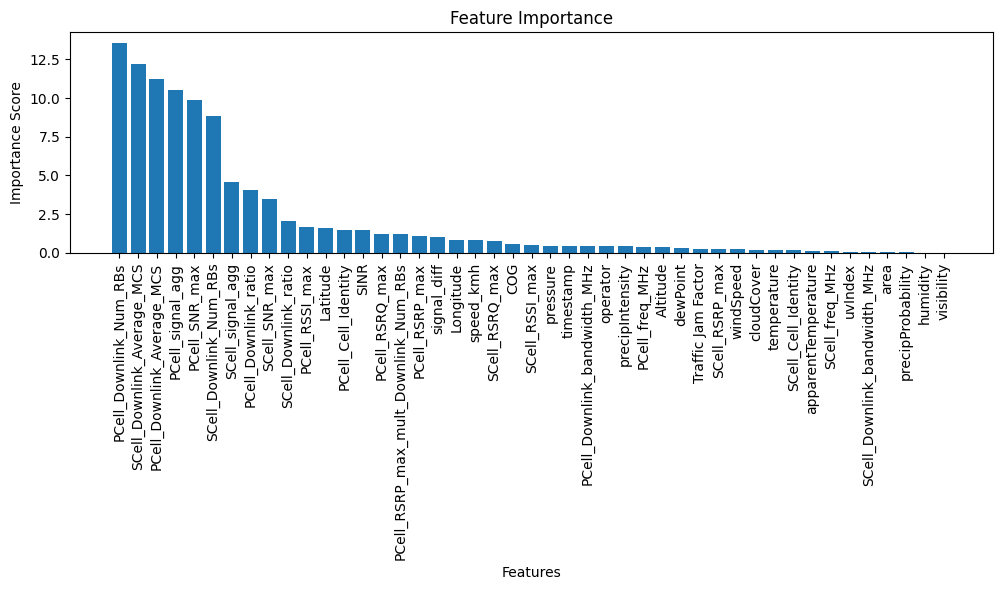

In [ ]:
# Get the feature importance scores
feature_importance = model.get_feature_importance()

# Get the feature names
feature_names = X.columns

# Sort the feature importance scores and names in descending order
sorted_indices = feature_importance.argsort()[::-1]
sorted_importance = feature_importance[sorted_indices]
sorted_names = feature_names[sorted_indices]

# Plot the feature importance scores as bar graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance)
plt.xticks(range(len(sorted_importance)), sorted_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [ ]:
test_inputs

timestamp  PCell_RSRP_max  PCell_RSRQ_max  PCell_RSSI_max  \
0      1.624374e+09      -97.121875      -12.923750      -87.554375   
1      1.624366e+09      -65.202500       -9.944375      -35.501875   
2      1.624376e+09      -79.298125      -17.468750      -74.823750   
3      1.624374e+09     -110.128125      -13.513750      -92.566875   
4      1.624374e+09     -117.451250      -18.753125      -93.048125   
...             ...             ...             ...             ...   
34269           NaN             NaN             NaN             NaN   
34270           NaN             NaN             NaN             NaN   
34271           NaN             NaN             NaN             NaN   
34272           NaN             NaN             NaN             NaN   
34273           NaN             NaN             NaN             NaN   

       PCell_SNR_max  PCell_Downlink_Num_RBs  PCell_Downlink_Average_MCS  \
0             13.293                 39276.0                        24.0   
1             21.823                 39566.0                        25.0   
2             24.114                 41900.0                        27.0   
3              6.282                 76310.0                        18.0   
4             -5.767                 44887.0                         7.0   
...              ...                     ...                         ...   
34269            NaN                     NaN                         NaN   
34270            NaN                     NaN                         NaN   
34271            NaN                     NaN                         NaN   
34272            NaN                     NaN                         NaN   
34273            NaN                     NaN                         NaN   

       PCell_Downlink_bandwidth_MHz  PCell_Cell_Identity  PCell_freq_MHz  ...  \
0                              20.0            3499534.0          2600.0  ...   
1                              20.0           26358784.0          1800.0  ...   
2                              20.0            2843400.0          1800.0  ...   
3                              20.0            3499534.0          2600.0  ...   
4                              20.0            3282957.0          2600.0  ...   
...                             ...                  ...             ...  ...   
34269                           NaN                  NaN             NaN  ...   
34270                           NaN                  NaN             NaN  ...   
34271                           NaN                  NaN             NaN  ...   
34272                           NaN                  NaN             NaN  ...   
34273                           NaN                  NaN             NaN  ...   

       area  device_pc1  device_pc3  PCell_signal_agg  SCell_signal_agg  \
0       0.0           1           0            13.293             0.000   
1       2.0           0           1            21.823            14.476   
2       2.0           0           1            24.114            19.486   
3       1.0           1           0             6.282             0.000   
4       0.0           1           0            -5.767             0.000   
...     ...         ...         ...               ...               ...   
34269   NaN           1           0               NaN               NaN   
34270   NaN           0           1               NaN               NaN   
34271   NaN           0           1               NaN               NaN   
34272   NaN           1           0               NaN               NaN   
34273   NaN           0           1               NaN               NaN   

       signal_diff      SINR  PCell_Downlink_ratio  SCell_Downlink_ratio  \
0           13.293  7.514992               1963.80                   NaN   
1            7.347  6.556722               1978.30                   inf   
2            4.628  4.539428               2095.00                2437.8   
3            6.282  8.149339               3815.50                

In [ ]:
y_pred = model.predict(test)

In [ ]:
y_pred

array([23175368.40284451, 61664824.7623416 , 80131871.66948852, ...,
       18076008.62409632, 11102778.44469894, 30974768.06870288])

In [ ]:
predictions = modell.predict(test_inputs.values)

In [ ]:
predictions

array([21003951.83697414, 58418513.60435767, 81712383.10610773, ...,
       20747376.72745167, 17902688.69533377, 36906185.98577459])

In [ ]:
# Add index to results
predictions_df = pd.DataFrame({'id': test_df.id, 'target': y_pred})
predictions_df.to_csv("m11.csv", index = False)
predictions_df.head()

id        target
0  Id_ln0e0hfrgx  2.317537e+07
1  Id_svf7nz9fxv  6.166482e+07
2  Id_ww2mh07gwj  8.013187e+07
3  Id_v88r4y03ww  2.162541e+07
4  Id_2u4y4kzglh  3.910629e+06

##feature engineering

In [ ]:
# Signal Strength Difference
train_inputs['signal_strength_diff'] = train_inputs['PCell_RSRP_max'] - train_inputs['SCell_RSRP_max']
test_inputs['signal_strength_diff'] = test_inputs['PCell_RSRP_max'] - test_inputs['SCell_RSRP_max']

# Signal Quality Difference
train_inputs['signal_quality_diff'] = train_inputs['PCell_RSRQ_max'] - train_inputs['SCell_RSRQ_max']
test_inputs['signal_quality_diff'] = test_inputs['PCell_RSRQ_max'] - test_inputs['SCell_RSRQ_max']

# Signal Strength Ratio
train_inputs['signal_strength_ratio'] = train_inputs['PCell_RSRP_max'] / train_inputs['SCell_RSRP_max']
test_inputs['signal_strength_ratio'] = test_inputs['PCell_RSRP_max'] / test_inputs['SCell_RSRP_max']

# Signal Quality Ratio
train_inputs['signal_quality_ratio'] = train_inputs['PCell_RSRQ_max'] / train_inputs['SCell_RSRQ_max']
test_inputs['signal_quality_ratio'] = test_inputs['PCell_RSRQ_max'] / test_inputs['SCell_RSRQ_max']

# Resource Block Ratio
train_inputs['resource_block_ratio'] = train_inputs['PCell_Downlink_Num_RBs'] / train_inputs['SCell_Downlink_Num_RBs']
test_inputs['resource_block_ratio'] = test_inputs['PCell_Downlink_Num_RBs'] / test_inputs['SCell_Downlink_Num_RBs']

# MCS Difference
train_inputs['mcs_difference'] = train_inputs['PCell_Downlink_Average_MCS'] - train_inputs['SCell_Downlink_Average_MCS']
test_inputs['mcs_difference'] = test_inputs['PCell_Downlink_Average_MCS'] - test_inputs['SCell_Downlink_Average_MCS']

# Bandwidth Difference
train_inputs['bandwidth_difference'] = train_inputs['PCell_Downlink_bandwidth_MHz'] - train_inputs['SCell_Downlink_bandwidth_MHz']
test_inputs['bandwidth_difference'] = test_inputs['PCell_Downlink_bandwidth_MHz'] - test_inputs['SCell_Downlink_bandwidth_MHz']

# Frequency Difference
train_inputs['frequency_difference'] = train_inputs['PCell_freq_MHz'] - train_inputs['SCell_freq_MHz']
test_inputs['frequency_difference'] = test_inputs['PCell_freq_MHz'] - test_inputs['SCell_freq_MHz']


In [ ]:
# Aggregated Transport Block Size Ratio
#train_inputs['tb_size_ratio'] = train_inputs['PCell_Downlink_TB_Size'] / train_inputs['SCell_Downlink_TB_Size']
#test_inputs['tb_size_ratio'] = test_inputs['PCell_Downlink_TB_Size'] / test_inputs['SCell_Downlink_TB_Size']

# Cell Identity Difference
train_inputs['cell_identity_diff'] = train_inputs['PCell_Cell_Identity'] - train_inputs['SCell_Cell_Identity']
test_inputs['cell_identity_diff'] = test_inputs['PCell_Cell_Identity'] - test_inputs['SCell_Cell_Identity']

# Cell Identity Ratio
train_inputs['cell_identity_ratio'] = train_inputs['PCell_Cell_Identity'] / train_inputs['SCell_Cell_Identity']
test_inputs['cell_identity_ratio'] = test_inputs['PCell_Cell_Identity'] / test_inputs['SCell_Cell_Identity']

# SNR Difference
train_inputs['snr_difference'] = train_inputs['PCell_SNR_max'] - train_inputs['SCell_SNR_max']
test_inputs['snr_difference'] = test_inputs['PCell_SNR_max'] - test_inputs['SCell_SNR_max']

# SNR Ratio
train_inputs['snr_ratio'] = train_inputs['PCell_SNR_max'] / train_inputs['SCell_SNR_max']
test_inputs['snr_ratio'] = test_inputs['PCell_SNR_max'] / test_inputs['SCell_SNR_max']

# Aggregated Downlink MCS Ratio
train_inputs['mcs_ratio'] = train_inputs['PCell_Downlink_Average_MCS'] / train_inputs['SCell_Downlink_Average_MCS']
test_inputs['mcs_ratio'] = test_inputs['PCell_Downlink_Average_MCS'] / test_inputs['SCell_Downlink_Average_MCS']


In [ ]:
# Signal Power Difference
train_inputs['signal_power_diff'] = train_inputs['PCell_RSRP_max'] - train_inputs['SCell_RSRP_max']
test_inputs['signal_power_diff'] = test_inputs['PCell_RSRP_max'] - test_inputs['SCell_RSRP_max']

# Signal Power Ratio
train_inputs['signal_power_ratio'] = train_inputs['PCell_RSRP_max'] / train_inputs['SCell_RSRP_max']
test_inputs['signal_power_ratio'] = test_inputs['PCell_RSRP_max'] / test_inputs['SCell_RSRP_max']

# Signal Quality Difference
train_inputs['signal_quality_diff'] = train_inputs['PCell_RSRQ_max'] - train_inputs['SCell_RSRQ_max']
test_inputs['signal_quality_diff'] = test_inputs['PCell_RSRQ_max'] - test_inputs['SCell_RSRQ_max']

# Signal Quality Ratio
train_inputs['signal_quality_ratio'] = train_inputs['PCell_RSRQ_max'] / train_inputs['SCell_RSRQ_max']
test_inputs['signal_quality_ratio'] = test_inputs['PCell_RSRQ_max'] / test_inputs['SCell_RSRQ_max']

# Downlink Bandwidth Ratio
train_inputs['downlink_bandwidth_ratio'] = train_inputs['PCell_Downlink_bandwidth_MHz'] / train_inputs['SCell_Downlink_bandwidth_MHz']
test_inputs['downlink_bandwidth_ratio'] = test_inputs['PCell_Downlink_bandwidth_MHz'] / test_inputs['SCell_Downlink_bandwidth_MHz']

# Frequency Difference
train_inputs['frequency_diff'] = train_inputs['PCell_freq_MHz'] - train_inputs['SCell_freq_MHz']
test_inputs['frequency_diff'] = test_inputs['PCell_freq_MHz'] - test_inputs['SCell_freq_MHz']


In [ ]:
# Average Signal Power
train_inputs['avg_signal_power'] = (train_inputs['PCell_RSRP_max'] + train_inputs['SCell_RSRP_max']) / 2
test_inputs['avg_signal_power'] = (test_inputs['PCell_RSRP_max'] + test_inputs['SCell_RSRP_max']) / 2

# Average Signal Quality
train_inputs['avg_signal_quality'] = (train_inputs['PCell_RSRQ_max'] + train_inputs['SCell_RSRQ_max']) / 2
test_inputs['avg_signal_quality'] = (test_inputs['PCell_RSRQ_max'] + test_inputs['SCell_RSRQ_max']) / 2

# Average Downlink Bandwidth
train_inputs['avg_downlink_bandwidth'] = (train_inputs['PCell_Downlink_bandwidth_MHz'] + train_inputs['SCell_Downlink_bandwidth_MHz']) / 2
test_inputs['avg_downlink_bandwidth'] = (test_inputs['PCell_Downlink_bandwidth_MHz'] + test_inputs['SCell_Downlink_bandwidth_MHz']) / 2

# Cell Identity Difference
train_inputs['cell_identity_diff'] = train_inputs['PCell_Cell_Identity'] - train_inputs['SCell_Cell_Identity']
test_inputs['cell_identity_diff'] = test_inputs['PCell_Cell_Identity'] - test_inputs['SCell_Cell_Identity']


In [ ]:
# Signal Power Difference
train_inputs['signal_power_diff'] = train_inputs['PCell_RSRP_max'] - train_inputs['SCell_RSRP_max']
test_inputs['signal_power_diff'] = test_inputs['PCell_RSRP_max'] - test_inputs['SCell_RSRP_max']

# Signal Quality Difference
train_inputs['signal_quality_diff'] = train_inputs['PCell_RSRQ_max'] - train_inputs['SCell_RSRQ_max']
test_inputs['signal_quality_diff'] = test_inputs['PCell_RSRQ_max'] - test_inputs['SCell_RSRQ_max']

# Signal Strength Difference
train_inputs['signal_strength_diff'] = train_inputs['PCell_RSSI_max'] - train_inputs['SCell_RSSI_max']
test_inputs['signal_strength_diff'] = test_inputs['PCell_RSSI_max'] - test_inputs['SCell_RSSI_max']

# Signal-to-Noise Ratio Difference
train_inputs['snr_diff'] = train_inputs['PCell_SNR_max'] - train_inputs['SCell_SNR_max']
test_inputs['snr_diff'] = test_inputs['PCell_SNR_max'] - test_inputs['SCell_SNR_max']

# Downlink Resource Block Ratio
train_inputs['rb_ratio'] = train_inputs['PCell_Downlink_Num_RBs'] / train_inputs['SCell_Downlink_Num_RBs']
test_inputs['rb_ratio'] = test_inputs['PCell_Downlink_Num_RBs'] / test_inputs['SCell_Downlink_Num_RBs']


In [ ]:
# Bandwidth Difference
train_inputs['bandwidth_diff'] = train_inputs['PCell_Downlink_bandwidth_MHz'] - train_inputs['SCell_Downlink_bandwidth_MHz']
test_inputs['bandwidth_diff'] = test_inputs['PCell_Downlink_bandwidth_MHz'] - test_inputs['SCell_Downlink_bandwidth_MHz']

# Cell Identity Difference
train_inputs['cell_identity_diff'] = train_inputs['PCell_Cell_Identity'] - train_inputs['SCell_Cell_Identity']
test_inputs['cell_identity_diff'] = test_inputs['PCell_Cell_Identity'] - test_inputs['SCell_Cell_Identity']

# Frequency Difference
train_inputs['frequency_diff'] = train_inputs['PCell_freq_MHz'] - train_inputs['SCell_freq_MHz']
test_inputs['frequency_diff'] = test_inputs['PCell_freq_MHz'] - test_inputs['SCell_freq_MHz']

# Downlink Transport Block Size Difference
#train_inputs['tb_size_diff'] = train_inputs['PCell_Downlink_TB_Size'] - train_inputs['SCell_Downlink_TB_Size']
#test_inputs['tb_size_diff'] = test_inputs['PCell_Downlink_TB_Size'] - test_inputs['SCell_Downlink_TB_Size']

# Downlink Average MCS Difference
train_inputs['avg_mcs_diff'] = train_inputs['PCell_Downlink_Average_MCS'] - train_inputs['SCell_Downlink_Average_MCS']
test_inputs['avg_mcs_diff'] = test_inputs['PCell_Downlink_Average_MCS'] - test_inputs['SCell_Downlink_Average_MCS']


In [ ]:
train_inputs['rsrp_diff'] = train_inputs['PCell_RSRP_max'] - train_inputs['SCell_RSRP_max']
test_inputs['rsrp_diff'] = test_inputs['PCell_RSRP_max'] - test_inputs['SCell_RSRP_max']


In [ ]:
train_inputs['rsrq_diff'] = train_inputs['PCell_RSRQ_max'] - train_inputs['SCell_RSRQ_max']
test_inputs['rsrq_diff'] = test_inputs['PCell_RSRQ_max'] - test_inputs['SCell_RSRQ_max']



In [ ]:
train_inputs['snr_diff'] = train_inputs['PCell_SNR_max'] - train_inputs['SCell_SNR_max']
test_inputs['snr_diff'] = test_inputs['PCell_SNR_max'] - test_inputs['SCell_SNR_max']


In [ ]:
import numpy as np

reference_latitude = train_inputs['Latitude'].mean()
reference_longitude = train_inputs['Longitude'].mean()

train_inputs['distance_from_reference'] = np.sqrt((train_inputs['Latitude'] - reference_latitude)**2 + (train_inputs['Longitude'] - reference_longitude)**2)
test_inputs['distance_from_reference'] = np.sqrt((test_inputs['Latitude'] - reference_latitude)**2 + (test_inputs['Longitude'] - reference_longitude)**2)


In [ ]:
train_inputs['elevation_change'] = train_inputs['Altitude'].diff()
test_inputs['elevation_change'] = test_inputs['Altitude'].diff()


In [ ]:
train_inputs['speed_change'] = train_inputs['speed_kmh'].diff()
test_inputs['speed_change'] = test_inputs['speed_kmh'].diff()


In [ ]:
train_inputs['direction_change'] = train_inputs['COG'].diff()
test_inputs['direction_change'] = test_inputs['COG'].diff()


In [ ]:
#speed_bins = [0, 20, 40, 60, 80, 100, np.inf]
#speed_labels = ['0-20', '20-40', '40-60', '60-80', '80-100', '100+']

#train_inputs['speed_category'] = pd.cut(train_inputs['speed_kmh'], bins=speed_bins, labels=speed_labels)
#test_inputs['speed_category'] = pd.cut(test_inputs['speed_kmh'], bins=speed_bins, labels=speed_labels)


In [ ]:
train_inputs['direction_sin'] = np.sin(np.radians(train_inputs['COG']))
train_inputs['direction_cos'] = np.cos(np.radians(train_inputs['COG']))

test_inputs['direction_sin'] = np.sin(np.radians(test_inputs['COG']))
test_inputs['direction_cos'] = np.cos(np.radians(test_inputs['COG']))


In [ ]:
train_inputs['speed_variation'] = train_inputs['speed_kmh'].diff()
test_inputs['speed_variation'] = test_inputs['speed_kmh'].diff()


In [ ]:
train_inputs['angular_velocity'] = train_inputs['COG'].diff()
test_inputs['angular_velocity'] = test_inputs['COG'].diff()


In [ ]:
device_counts = train_inputs['device'].value_counts()
train_inputs['device_count'] = train_inputs['device'].map(device_counts)
test_inputs['device_count'] = test_inputs['device'].map(device_counts)


In [ ]:
train_inputs['windSpeed_squared'] = train_inputs['windSpeed'] ** 2
test_inputs['windSpeed_squared'] = test_inputs['windSpeed'] ** 2


In [ ]:
train_inputs['trafficJamFactor_squared'] = train_inputs['Traffic Jam Factor'] ** 2
test_inputs['trafficJamFactor_squared'] = test_inputs['Traffic Jam Factor'] ** 2


In [ ]:
# Select features
dropped_columns = ['id','device']
train_inputs.drop(columns=dropped_columns, inplace=True)
test_inputs.drop(columns=dropped_columns, inplace=True)

In [ ]:
# Create network-related features
train_inputs['PCell_signal_agg'] = train_inputs[['PCell_RSRP_max', 'PCell_RSRQ_max', 'PCell_RSSI_max', 'PCell_SNR_max']].max(axis=1)
train_inputs['SCell_signal_agg'] = train_inputs[['SCell_RSRP_max', 'SCell_RSRQ_max', 'SCell_RSSI_max', 'SCell_SNR_max']].max(axis=1)
train_inputs['signal_diff'] = train_inputs['PCell_signal_agg'] - train_inputs['SCell_signal_agg']
train_inputs['SINR'] = train_inputs['PCell_RSRP_max'] / train_inputs['PCell_RSRQ_max']
# Calculate the SINR (Signal-to-Interference-plus-Noise Ratio)
#train_inputs['SINR'] = np.where(train_inputs['PCell_RSRQ_max'] != 0, train_inputs['PCell_RSRP_max'] / train_inputs['PCell_RSRQ_max'], 0.0)

test_inputs['PCell_signal_agg'] = test_inputs[['PCell_RSRP_max', 'PCell_RSRQ_max', 'PCell_RSSI_max', 'PCell_SNR_max']].max(axis=1)
test_inputs['SCell_signal_agg'] = test_inputs[['SCell_RSRP_max', 'SCell_RSRQ_max', 'SCell_RSSI_max', 'SCell_SNR_max']].max(axis=1)
test_inputs['signal_diff'] = test_inputs['PCell_signal_agg'] - test_inputs['SCell_signal_agg']
test_inputs['SINR'] = test_inputs['PCell_RSRP_max'] / test_inputs['PCell_RSRQ_max']
# Calculate the SINR (Signal-to-Interference-plus-Noise Ratio)
#test_inputs['SINR'] = np.where(test_inputs['PCell_RSRQ_max'] != 0, test_inputs['PCell_RSRP_max'] / test_inputs['PCell_RSRQ_max'], 0.0)




In [ ]:
# Create network parameter features
train_inputs['PCell_Downlink_ratio'] = train_inputs['PCell_Downlink_Num_RBs'] / train_inputs['PCell_Downlink_bandwidth_MHz']
train_inputs['SCell_Downlink_ratio'] = train_inputs['SCell_Downlink_Num_RBs'] / train_inputs['SCell_Downlink_bandwidth_MHz']

import numpy as np

# Calculate the PCell Downlink ratio
#train_inputs['PCell_Downlink_ratio'] = np.where(train_inputs['PCell_Downlink_bandwidth_MHz'] != 0, train_inputs['PCell_Downlink_Num_RBs'] / train_inputs['PCell_Downlink_bandwidth_MHz'], 0.0)

# Calculate the SCell Downlink ratio
#train_inputs['SCell_Downlink_ratio'] = np.where(train_inputs['SCell_Downlink_bandwidth_MHz'] != 0, train_inputs['SCell_Downlink_Num_RBs'] / train_inputs['SCell_Downlink_bandwidth_MHz'], 0.0)




In [ ]:
# Create network parameter features
test_inputs['PCell_Downlink_ratio'] = test_inputs['PCell_Downlink_Num_RBs'] / test_inputs['PCell_Downlink_bandwidth_MHz']
test_inputs['SCell_Downlink_ratio'] = test_inputs['SCell_Downlink_Num_RBs'] / test_inputs['SCell_Downlink_bandwidth_MHz']



import numpy as np

# Calculate the PCell Downlink ratio
#test_inputs['PCell_Downlink_ratio'] = np.where(test_inputs['PCell_Downlink_bandwidth_MHz'] != 0, test_inputs['PCell_Downlink_Num_RBs'] / test_inputs['PCell_Downlink_bandwidth_MHz'], 0.0)

# Calculate the SCell Downlink ratio
#test_inputs['SCell_Downlink_ratio'] = np.where(test_inputs['SCell_Downlink_bandwidth_MHz'] != 0, test_inputs['SCell_Downlink_Num_RBs'] / test_inputs['SCell_Downlink_bandwidth_MHz'], 0.0)



In [ ]:
train_inputs['PCell_RSRP_max_mult_Downlink_Num_RBs'] = train_inputs['PCell_RSRP_max'] * train_inputs['PCell_Downlink_Num_RBs']
test_inputs['PCell_RSRP_max_mult_Downlink_Num_RBs'] = test_inputs['PCell_RSRP_max'] * test_inputs['PCell_Downlink_Num_RBs']


In [ ]:
#train_inputs['PCell_RSRP_RSRQ_ratio'] = train_inputs['PCell_RSRP_max'] / train_inputs['PCell_RSRQ_max']
#test_inputs['PCell_RSRP_RSRQ_ratio'] = test_inputs['PCell_RSRP_max'] / test_inputs['PCell_RSRQ_max']



import numpy as np

# Calculate the PCell RSRP to RSRQ ratio in the training dataset
train_inputs['PCell_RSRP_RSRQ_ratio'] = np.where(train_inputs['PCell_RSRQ_max'] != 0, train_inputs['PCell_RSRP_max'] / train_inputs['PCell_RSRQ_max'], 0.0)

# Calculate the PCell RSRP to RSRQ ratio in the test dataset
test_inputs['PCell_RSRP_RSRQ_ratio'] = np.where(test_inputs['PCell_RSRQ_max'] != 0, test_inputs['PCell_RSRP_max'] / test_inputs['PCell_RSRQ_max'], 0.0)


In [ ]:
#train_inputs['PCell_RSSI_SNR_ratio'] = train_inputs['PCell_RSSI_max'] / train_inputs['PCell_SNR_max']
#test_inputs['PCell_RSSI_SNR_ratio'] = test_inputs['PCell_RSSI_max'] / test_inputs['PCell_SNR_max']



import numpy as np

# Calculate the PCell RSSI to SNR ratio in the training dataset
train_inputs['PCell_RSSI_SNR_ratio'] = np.where(train_inputs['PCell_SNR_max'] != 0, train_inputs['PCell_RSSI_max'] / train_inputs['PCell_SNR_max'], 0.0)

# Calculate the PCell RSSI to SNR ratio in the test dataset
test_inputs['PCell_RSSI_SNR_ratio'] = np.where(test_inputs['PCell_SNR_max'] != 0, test_inputs['PCell_RSSI_max'] / test_inputs['PCell_SNR_max'], 0.0)


In [ ]:
#train_inputs['PCell_NumRBs_AvgMCS_ratio'] = train_inputs['PCell_Downlink_Num_RBs'] / train_inputs['PCell_Downlink_Average_MCS']
#test_inputs['PCell_NumRBs_AvgMCS_ratio'] = test_inputs['PCell_Downlink_Num_RBs'] / test_inputs['PCell_Downlink_Average_MCS']


import numpy as np

# Calculate the PCell NumRBs to AvgMCS ratio in the training dataset
train_inputs['PCell_NumRBs_AvgMCS_ratio'] = np.where(train_inputs['PCell_Downlink_Average_MCS'] != 0, train_inputs['PCell_Downlink_Num_RBs'] / train_inputs['PCell_Downlink_Average_MCS'], 0.0)

# Calculate the PCell NumRBs to AvgMCS ratio in the test dataset
test_inputs['PCell_NumRBs_AvgMCS_ratio'] = np.where(test_inputs['PCell_Downlink_Average_MCS'] != 0, test_inputs['PCell_Downlink_Num_RBs'] / test_inputs['PCell_Downlink_Average_MCS'], 0.0)





In [ ]:
#train_inputs['SCell_RSRP_RSRQ_ratio'] = train_inputs['SCell_RSRP_max'] / train_inputs['SCell_RSRQ_max']
#test_inputs['SCell_RSRP_RSRQ_ratio'] = test_inputs['SCell_RSRP_max'] / test_inputs['SCell_RSRQ_max']
train_inputs['SCell_RSRP_RSRQ_ratio'] = np.where(train_inputs['SCell_RSRQ_max'] != 0, train_inputs['SCell_RSRP_max'] / train_inputs['SCell_RSRQ_max'], 0)
test_inputs['SCell_RSRP_RSRQ_ratio'] = np.where(test_inputs['SCell_RSRQ_max'] != 0, test_inputs['SCell_RSRP_max'] / test_inputs['SCell_RSRQ_max'], 0)





In [ ]:
train_inputs['SCell_RSSI_SNR_ratio'] = train_inputs['SCell_RSSI_max'] / train_inputs['SCell_SNR_max']
test_inputs['SCell_RSSI_SNR_ratio'] = test_inputs['SCell_RSSI_max'] / test_inputs['SCell_SNR_max']


In [ ]:
train_inputs['SCell_NumRBs_AvgMCS_ratio'] = train_inputs['SCell_Downlink_Num_RBs'] / train_inputs['SCell_Downlink_Average_MCS']
test_inputs['SCell_NumRBs_AvgMCS_ratio'] = test_inputs['SCell_Downlink_Num_RBs'] / test_inputs['SCell_Downlink_Average_MCS']

In [ ]:
train_inputs['RSRP_max_difference'] = abs(train_inputs['PCell_RSRP_max'] - train_inputs['SCell_RSRP_max'])
test_inputs['RSRP_max_difference'] = abs(test_inputs['PCell_RSRP_max'] - test_inputs['SCell_RSRP_max'])


In [ ]:
train_inputs['RSRQ_max_difference'] = abs(train_inputs['PCell_RSRQ_max'] - train_inputs['SCell_RSRQ_max'])
test_inputs['RSRQ_max_difference'] = abs(test_inputs['PCell_RSRQ_max'] - test_inputs['SCell_RSRQ_max'])


In [ ]:
train_inputs['RSSI_max_difference'] = abs(train_inputs['PCell_RSSI_max'] - train_inputs['SCell_RSSI_max'])
test_inputs['RSSI_max_difference'] = abs(test_inputs['PCell_RSSI_max'] - test_inputs['SCell_RSSI_max'])


In [ ]:
train_inputs['SNR_max_difference'] = abs(train_inputs['PCell_SNR_max'] - train_inputs['SCell_SNR_max'])
test_inputs['SNR_max_difference'] = abs(test_inputs['PCell_SNR_max'] - test_inputs['SCell_SNR_max'])


In [ ]:
train_inputs['Total_NumRBs'] = train_inputs['PCell_Downlink_Num_RBs'] + train_inputs['SCell_Downlink_Num_RBs']
test_inputs['Total_NumRBs'] = test_inputs['PCell_Downlink_Num_RBs'] + test_inputs['SCell_Downlink_Num_RBs']


In [ ]:
train_inputs['MCS_difference'] = train_inputs['PCell_Downlink_Average_MCS'] - train_inputs['SCell_Downlink_Average_MCS']
test_inputs['MCS_difference'] = test_inputs['PCell_Downlink_Average_MCS'] - test_inputs['SCell_Downlink_Average_MCS']


In [ ]:
# Relative distance features
train_inputs['latitude_change'] = train_inputs['Latitude'].diff()
train_inputs['longitude_change'] = train_inputs['Longitude'].diff()
train_inputs['altitude_change'] = train_inputs['Altitude'].diff()


In [ ]:
# Relative distance features
test_inputs['latitude_change'] = test_inputs['Latitude'].diff()
test_inputs['longitude_change'] = test_inputs['Longitude'].diff()
test_inputs['altitude_change'] = test_inputs['Altitude'].diff()


In [ ]:
# Create pressure difference feature
train_inputs['pressure_diff'] = train_inputs['pressure'].diff()
test_inputs['pressure_diff'] = test_inputs['pressure'].diff()

In [ ]:
# Create relative humidity feature
#train_inputs['relative_humidity'] = 100 * (train_inputs['humidity'] / train_inputs['dewPoint'])
#test_inputs['relative_humidity'] = 100 * (test_inputs['humidity'] / test_inputs['dewPoint'])

train_inputs['relative_humidity'] = np.where(train_inputs['dewPoint'] != 0, 100 * (train_inputs['humidity'] / train_inputs['dewPoint']), 0)
test_inputs['relative_humidity'] = np.where(test_inputs['dewPoint'] != 0, 100 * (test_inputs['humidity'] / test_inputs['dewPoint']), 0)


# Create temperature difference feature
#train_inputs['temperature_diff'] = train_inputs['temperature'].diff()
#test_inputs['temperature_diff'] = test_inputs['temperature'].diff()

In [ ]:
# 3. Feature Interactions
train_inputs['cloud_uv_interaction'] = train_inputs['cloudCover'] * train_inputs['uvIndex']
train_inputs['visibility_traffic_interaction'] = train_inputs['visibility'] * train_inputs['Traffic Jam Factor']

# 3. Feature Interactions
test_inputs['cloud_uv_interaction'] = test_inputs['cloudCover'] * test_inputs['uvIndex']
test_inputs['visibility_traffic_interaction'] = test_inputs['visibility'] * test_inputs['Traffic Jam Factor']



In [ ]:
#Create mobility-related features
train_inputs['speed_range'] = pd.cut(train_inputs['speed_kmh'], bins=[0, 20, 60, float('inf')], labels=['slow', 'moderate', 'high'])
train_inputs['is_stationary'] = train_inputs['speed_kmh'].apply(lambda speed: 1 if speed == 0 else 0)
train_inputs.drop(['speed_kmh'], axis=1, inplace=True)

In [ ]:
#Create mobility-related features
test_inputs['speed_range'] = pd.cut(test_inputs['speed_kmh'], bins=[0, 20, 60, float('inf')], labels=['slow', 'moderate', 'high'])
test_inputs['is_stationary'] = test_inputs['speed_kmh'].apply(lambda speed: 1 if speed == 0 else 0)
test_inputs.drop(['speed_kmh'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Encode the bin labels
train_inputs['speed_range'] = encoder.fit_transform(train_inputs['speed_range'])








from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Encode the bin labels
test_inputs['speed_range'] = encoder.fit_transform(test_inputs['speed_range'])



KeyError: ignored

In [ ]:
train_inputs.head()

timestamp  PCell_RSRP_max  PCell_RSRQ_max  PCell_RSSI_max  PCell_SNR_max  \
0  1624367008      -84.498750      -14.586875      -49.855625         16.457   
1  1624372465      -86.818125      -11.982500      -54.838125         16.674   
2  1624371871     -101.916250      -13.257500      -71.241250          9.392   
3  1624542066      -95.598750      -14.696250      -61.660000         10.726   
4  1624542798      -97.735000      -14.867500      -63.170625         10.889   

   PCell_Downlink_Num_RBs  PCell_Downlink_Average_MCS  \
0                 35076.0                        23.0   
1                 42704.0                        24.0   
2                 36017.0                        22.0   
3                 95955.0                        17.0   
4                 83062.0                        19.0   

   PCell_Downlink_bandwidth_MHz  PCell_Cell_Identity  PCell_freq_MHz  ...  \
0                          20.0           26368258.0          1800.0  ...   
1                          20.0            2568970.0          1800.0  ...   
2                          20.0            2824458.0          1800.0  ...   
3                          20.0           26367489.0          1800.0  ...   
4                          20.0           26369024.0          1800.0  ...   

   device_count  windSpeed_squared  trafficJamFactor_squared  \
0         19505             5.7121                  0.151936   
1         14769             5.2441                 14.312754   
2         14769             4.5369                  4.344098   
3         19505             3.8809                 77.563601   
4         19505             3.8809                  4.921432   

   PCell_signal_agg  SCell_signal_agg  signal_diff      SINR  \
0            16.457            17.690       -1.233  5.792793   
1            16.674            14.863        1.811  7.245410   
2             9.392             0.000        9.392  7.687441   
3            10.726             0.000       10.726  6.504976   
4            10.889             0.000       10.889  6.573735   

   PCell_Downlink_ratio  SCell_Downlink_ratio  \
0               1753.80                   0.0   
1               2135.20                2418.6   
2               1800.85                   0.0   
3               4797.75                   0.0   
4               4153.10                   0.0   

   PCell_RSRP_max_mult_Downlink_Num_RBs  
0                         -2.963878e+06  
1                         -3.707481e+06  
2                         -3.670718e+06  
3                         -9.173178e+06  
4                         -8.118065e+06  

[5 rows x 82 columns]

In [ ]:
test_inputs.head()

timestamp  PCell_RSRP_max  PCell_RSRQ_max  PCell_RSSI_max  PCell_SNR_max  \
0  1624374179      -97.121875      -12.923750      -87.554375         13.293   
1  1624366264      -65.202500       -9.944375      -35.501875         21.823   
2  1624375795      -79.298125      -17.468750      -74.823750         24.114   
3  1624374065     -110.128125      -13.513750      -92.566875          6.282   
4  1624374361     -117.451250      -18.753125      -93.048125         -5.767   

   PCell_Downlink_Num_RBs  PCell_Downlink_Average_MCS  \
0                 39276.0                        24.0   
1                 39566.0                        25.0   
2                 41900.0                        27.0   
3                 76310.0                        18.0   
4                 44887.0                         7.0   

   PCell_Downlink_bandwidth_MHz  PCell_Cell_Identity  PCell_freq_MHz  ...  \
0                            20            3499534.0          2600.0  ...   
1                            20           26358784.0          1800.0  ...   
2                            20            2843400.0          1800.0  ...   
3                            20            3499534.0          2600.0  ...   
4                            20            3282957.0          2600.0  ...   

   device_count  windSpeed_squared  trafficJamFactor_squared  \
0           NaN             5.1529                  9.468052   
1           NaN             5.8564                  0.435600   
2           NaN             5.1076                  6.216545   
3           NaN             5.1529                 32.999740   
4           NaN             5.1529                 12.155752   

   PCell_signal_agg  SCell_signal_agg  signal_diff      SINR  \
0            13.293             0.000       13.293  7.514992   
1            21.823            14.476        7.347  6.556722   
2            24.114            19.486        4.628  4.539428   
3             6.282             0.000        6.282  8.149339   
4            -5.767             0.000       -5.767  6.263023   

   PCell_Downlink_ratio  SCell_Downlink_ratio  \
0               1963.80                   0.0   
1               1978.30                   0.0   
2               2095.00                2437.8   
3               3815.50                   0.0   
4               2244.35                   0.0   

   PCell_RSRP_max_mult_Downlink_Num_RBs  
0                         -3.814559e+06  
1                         -2.579802e+06  
2                         -3.322591e+06  
3                         -8.403877e+06  
4                         -5.272034e+06  

[5 rows x 82 columns]

In [ ]:
train_inputs.dtypes

timestamp                                 int64
PCell_RSRP_max                          float64
PCell_RSRQ_max                          float64
PCell_RSSI_max                          float64
PCell_SNR_max                           float64
                                         ...   
signal_diff                             float64
SINR                                    float64
PCell_Downlink_ratio                    float64
SCell_Downlink_ratio                    float64
PCell_RSRP_max_mult_Downlink_Num_RBs    float64
Length: 82, dtype: object

In [ ]:

categorical_feature = 'area'
# Count the number of unique variables in the categorical feature
num_variables =train_df[categorical_feature].nunique()
# Print the number of unique variables
print(f"The categorical feature '{categorical_feature}' has {num_variables} unique variables.")
# Get the unique variables in the categorical feature
unique_variables = train_df[categorical_feature].unique()

# Print the unique variables
print(f"Unique variables in '{categorical_feature}':")
for variable in unique_variables:
    print(variable)

The categorical feature 'area' has 5 unique variables.
Unique variables in 'area':
Residential
Avenue
Park
Highway
Tunnel


In [ ]:
categorical_feature = 'device'
# Count the number of unique variables in the categorical feature
num_variables =train_df[categorical_feature].nunique()
# Print the number of unique variables
print(f"The categorical feature '{categorical_feature}' has {num_variables} unique variables.")
# Get the unique variables in the categorical feature
unique_variables = train_df[categorical_feature].unique()
# Print the unique variables
print(f"Unique variables in '{categorical_feature}':")
for variable in unique_variables:
    print(variable)

The categorical feature 'device' has 2 unique variables.
Unique variables in 'device':
pc1
pc3


In [ ]:
categorical_feature= 'speed_range'
# Count the number of unique variables in the categorical feature
num_variables =train_inputs[categorical_feature].nunique()
# Print the number of unique variables
print(f"The tegorical feature '{categorical_feature}' has {num_variables} unique variables.")
# Get the unique variables in the categorical feature
unique_variables = train_inputs[categorical_feature].unique()
# Print the unique variables
print(f"Unique variables in '{categorical_feature}':")
for variable in unique_variables:
    print(variable)

The tegorical feature 'speed_range' has 3 unique variables.
Unique variables in 'speed_range':
nan
slow
moderate
high


# Data preparation

In [ ]:
train_inputs.head()


timestamp  PCell_RSRP_max  PCell_RSRQ_max  PCell_RSSI_max  PCell_SNR_max  \
0  1624367008      -84.498750      -14.586875      -49.855625         16.457   
1  1624372465      -86.818125      -11.982500      -54.838125         16.674   
2  1624371871     -101.916250      -13.257500      -71.241250          9.392   
3  1624542066      -95.598750      -14.696250      -61.660000         10.726   
4  1624542798      -97.735000      -14.867500      -63.170625         10.889   

   PCell_Downlink_Num_RBs  PCell_Downlink_Average_MCS  \
0                 35076.0                        23.0   
1                 42704.0                        24.0   
2                 36017.0                        22.0   
3                 95955.0                        17.0   
4                 83062.0                        19.0   

   PCell_Downlink_bandwidth_MHz  PCell_Cell_Identity  PCell_freq_MHz  ...  \
0                          20.0           26368258.0          1800.0  ...   
1                          20.0            2568970.0          1800.0  ...   
2                          20.0            2824458.0          1800.0  ...   
3                          20.0           26367489.0          1800.0  ...   
4                          20.0           26369024.0          1800.0  ...   

       SINR  PCell_Downlink_ratio  SCell_Downlink_ratio  \
0  5.792793               1753.80                   inf   
1  7.245410               2135.20                2418.6   
2  7.687441               1800.85                   NaN   
3  6.504976               4797.75                   NaN   
4  6.573735               4153.10                   NaN   

   PCell_RSRP_max_mult_Downlink_Num_RBs  trafficJamFactor_squared  \
0                         -2.963878e+06                  0.151936   
1                         -3.707481e+06                 14.312754   
2                         -3.670718e+06                  4.344098   
3                         -9.173178e+06                 77.563601   
4                         -8.118065e+06                  4.921432   

   windSpeed_squared  angular_velocity  speed_variation  direction_sin  \
0             5.7121               NaN              NaN      -0.901833   
1             5.2441            -136.6           0.0000       0.358368   
2             4.5369             112.2           0.0000      -0.999781   
3             3.8809            -102.2          14.6308       0.190809   
4             3.8809              93.4          -0.9260      -0.991216   

   direction_cos  
0       0.432086  
1      -0.933580  
2       0.020942  
3      -0.981627  
4      -0.132256  

[5 rows x 51 columns]

In [ ]:
test_inputs.head()

timestamp  PCell_RSRP_max  PCell_RSRQ_max  PCell_RSSI_max  PCell_SNR_max  \
0  1624374179      -97.121875      -12.923750      -87.554375         13.293   
1  1624366264      -65.202500       -9.944375      -35.501875         21.823   
2  1624375795      -79.298125      -17.468750      -74.823750         24.114   
3  1624374065     -110.128125      -13.513750      -92.566875          6.282   
4  1624374361     -117.451250      -18.753125      -93.048125         -5.767   

   PCell_Downlink_Num_RBs  PCell_Downlink_Average_MCS  \
0                 39276.0                        24.0   
1                 39566.0                        25.0   
2                 41900.0                        27.0   
3                 76310.0                        18.0   
4                 44887.0                         7.0   

   PCell_Downlink_bandwidth_MHz  PCell_Cell_Identity  PCell_freq_MHz  ...  \
0                            20            3499534.0          2600.0  ...   
1                            20           26358784.0          1800.0  ...   
2                            20            2843400.0          1800.0  ...   
3                            20            3499534.0          2600.0  ...   
4                            20            3282957.0          2600.0  ...   

       SINR  PCell_Downlink_ratio  SCell_Downlink_ratio  \
0  7.514992               1963.80                   NaN   
1  6.556722               1978.30                   inf   
2  4.539428               2095.00                2437.8   
3  8.149339               3815.50                   NaN   
4  6.263023               2244.35                   NaN   

   PCell_RSRP_max_mult_Downlink_Num_RBs  trafficJamFactor_squared  \
0                         -3.814559e+06                  9.468052   
1                         -2.579802e+06                  0.435600   
2                         -3.322591e+06                  6.216545   
3                         -8.403877e+06                 32.999740   
4                         -5.272034e+06                 12.155752   

   windSpeed_squared  angular_velocity  speed_variation  direction_sin  \
0             5.1529               NaN              NaN       0.999507   
1             5.8564              96.4           0.0000      -0.142629   
2             5.1076              67.0           0.0000      -0.966823   
3             5.1529            -241.3          35.3732       0.240228   
4             5.1529              70.0           6.4820       0.994338   

   direction_cos  
0      -0.031411  
1      -0.989776  
2      -0.255446  
3       0.970716  
4       0.106264  

[5 rows x 51 columns]

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'iterations': [100, 200, 1000],
    'learning_rate': [0.1, 0.01, 0.001],
    'depth': [4, 6, 8]
}

# Create an instance of CatBoost Regressor
model = CatBoostRegressor(loss_function='RMSE')

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(X, y)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best RMSE Score:", -best_score)

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.5 MB/s eta 0:00:00


In [ ]:
X=train_inputs
y=train_targets
test=test_inputs

In [ ]:
test

timestamp  PCell_RSRP_max  PCell_RSRQ_max  PCell_RSSI_max  \
0      1624374179      -97.121875      -12.923750      -87.554375   
1      1624366264      -65.202500       -9.944375      -35.501875   
2      1624375795      -79.298125      -17.468750      -74.823750   
3      1624374065     -110.128125      -13.513750      -92.566875   
4      1624374361     -117.451250      -18.753125      -93.048125   
...           ...             ...             ...             ...   
18238  1624370207      -81.506250       -9.556875      -78.813125   
18239  1624371137      -84.858750      -12.547500      -83.305000   
18240  1624376766      -82.406875      -12.343125      -79.631875   
18241  1624353986      -95.212500      -10.181875      -65.595625   
18242  1624369388     -103.098125      -15.954375      -67.630625   

       PCell_SNR_max  PCell_Downlink_Num_RBs  PCell_Downlink_Average_MCS  \
0             13.293                 39276.0                        24.0   
1             21.823                 39566.0                        25.0   
2             24.114                 41900.0                        27.0   
3              6.282                 76310.0                        18.0   
4             -5.767                 44887.0                         7.0   
...              ...                     ...                         ...   
18238         24.005                 49881.0                        28.0   
18239         11.985                 29323.0                        22.0   
18240         12.719                 37837.0                        21.0   
18241         11.800                 47277.0                        15.0   
18242          8.063                 44972.0                        11.0   

       PCell_Downlink_bandwidth_MHz  PCell_Cell_Identity  PCell_freq_MHz  ...  \
0                                20            3499534.0          2600.0  ...   
1                                20           26358784.0          1800.0  ...   
2                                20            2843400.0          1800.0  ...   
3                                20            3499534.0          2600.0  ...   
4                                20            3282957.0          2600.0  ...   
...                             ...                  ...             ...  ...   
18238                            20            4000013.0          2600.0  ...   
18239                            20            2940680.0          1800.0  ...   
18240                            20            2824458.0          1800.0  ...   
18241                            20           34006528.0          1800.0  ...   
18242                            20           33802241.0          1800.0  ...   

       visibility  Traffic Jam Factor  area  PCell_signal_agg  \
0          16.093             3.07702   0.0            13.293   
1          16.093             0.66000   2.0            21.823   
2          16.093             2.49330   2.0            24.114   
3          16.093             5.74454   1.0             6.282   
4          16.093             3.48651   0.0            -5.767   
...           ...                 ...   ...               ...   
18238      16.093             1.82751   2.0            24.005   
18239      16.093             3.14159   2.0            11.985   
18240      16.093             1.57307   3.0            12.719   
18241      16.093             0.51020   2.0            11.800   
18242      16.093             2.91490   2.0             8.063   

       SCell_signal_agg  signal_diff      SINR  PCell_Downlink_ratio  \
0                 0.000       13.293  7.514992               1963.80   
1                14.476        7.347  6.556722               1978.30   
2                19.486        4.628  4.539428               2095.00   
3                 0.000        6.282  8.149339               3815.50   
4                 0.000       -5.767  6.263023               2244.35   
...                 ...          ...       ...                   ...   
18238   

In [ ]:
X.isnull().sum()

timestamp                               0
PCell_RSRP_max                          0
PCell_RSRQ_max                          0
PCell_RSSI_max                          0
PCell_SNR_max                           0
                                       ..
signal_diff                             0
SINR                                    0
PCell_Downlink_ratio                    0
SCell_Downlink_ratio                    0
PCell_RSRP_max_mult_Downlink_Num_RBs    0
Length: 82, dtype: int64

In [ ]:
# Missing value imputation
X.fillna(0, inplace=True)

test.fillna(0, inplace=True)

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the number of folds for cross-validation
n_folds = 10

# Create an instance of CatBoostRegressor
# Create an instance of CatBoost Regressor
modell = CatBoostRegressor(loss_function='RMSE',iterations=1500)

# Convert the data to NumPy arrays
X = train_inputs.values
y = train_targets.values

# Perform K-fold cross-validation
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
rmse_scores = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Fit the model on the training data
    modell.fit(X_train, y_train)

    # Make predictions on the validation data
    y_pred = modell.predict(X_val)

    # Calculate the RMSE score for the fold
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse)

# Calculate the mean RMSE score across all folds
# Evaluate the model
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Root Mean Squared Error = {rmse / 1e6:.3f} Mbit/s")


Streaming output truncated to the last 5000 lines.
1004:	learn: 7709574.4400647	total: 18.6s	remaining: 9.17s
1005:	learn: 7707805.8398908	total: 18.6s	remaining: 9.15s
1006:	learn: 7706024.3248597	total: 18.7s	remaining: 9.13s
1007:	learn: 7705005.2474254	total: 18.7s	remaining: 9.12s
1008:	learn: 7703518.6741156	total: 18.7s	remaining: 9.1s
1009:	learn: 7702284.5647109	total: 18.7s	remaining: 9.07s
1010:	learn: 7701280.6841090	total: 18.7s	remaining: 9.06s
1011:	learn: 7699464.5079766	total: 18.8s	remaining: 9.04s
1012:	learn: 7697927.9244804	total: 18.8s	remaining: 9.02s
1013:	learn: 7697294.6676719	total: 18.8s	remaining: 9s
1014:	learn: 7695960.0296643	total: 18.8s	remaining: 8.98s
1015:	learn: 7692861.7082015	total: 18.8s	remaining: 8.96s
1016:	learn: 7691525.7692181	total: 18.8s	remaining: 8.94s
1017:	learn: 7689683.8804981	total: 18.8s	remaining: 8.92s
1018:	learn: 7688350.5708946	total: 18.9s	remaining: 8.9s
1019:	learn: 7686301.3643361	total: 18.9s	remaining: 8.88s
1020:	lear

In [ ]:
# Get the feature importance scores
feature_importance = modell.get_feature_importance()

# Get the feature names
feature_names = X.columns

# Sort the feature importance scores and names in descending order
sorted_indices = feature_importance.argsort()[::-1]
sorted_importance = feature_importance[sorted_indices]
sorted_names = feature_names[sorted_indices]

# Plot the feature importance scores as bar graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance)
plt.xticks(range(len(sorted_importance)), sorted_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()



AttributeError: ignored

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd



# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of CatBoost Regressor
model = CatBoostRegressor(loss_function='RMSE',iterations=1500)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Root Mean Squared Error = {rmse / 1e6:.3f} Mbit/s")


Learning rate set to 0.049685
0:	learn: 41322382.6142163	total: 40.5ms	remaining: 1m
1:	learn: 39749790.6283005	total: 75.8ms	remaining: 56.8s
2:	learn: 38250091.1584704	total: 112ms	remaining: 55.9s
3:	learn: 36796005.9830306	total: 136ms	remaining: 50.8s
4:	learn: 35460220.8589932	total: 158ms	remaining: 47.2s
5:	learn: 34195926.0545378	total: 180ms	remaining: 44.8s
6:	learn: 32992656.6378710	total: 211ms	remaining: 45.1s
7:	learn: 31866591.7133486	total: 229ms	remaining: 42.7s
8:	learn: 30815963.6361247	total: 245ms	remaining: 40.5s
9:	learn: 29807991.9462800	total: 260ms	remaining: 38.8s
10:	learn: 28841123.6018357	total: 280ms	remaining: 37.8s
11:	learn: 27930053.4165200	total: 296ms	remaining: 36.7s
12:	learn: 27075697.9783354	total: 313ms	remaining: 35.8s
13:	learn: 26269210.8913774	total: 332ms	remaining: 35.3s
14:	learn: 25519534.7457999	total: 348ms	remaining: 34.4s
15:	learn: 24809419.0374935	total: 364ms	remaining: 33.8s
16:	learn: 24103096.3340351	total: 381ms	remaining: 3

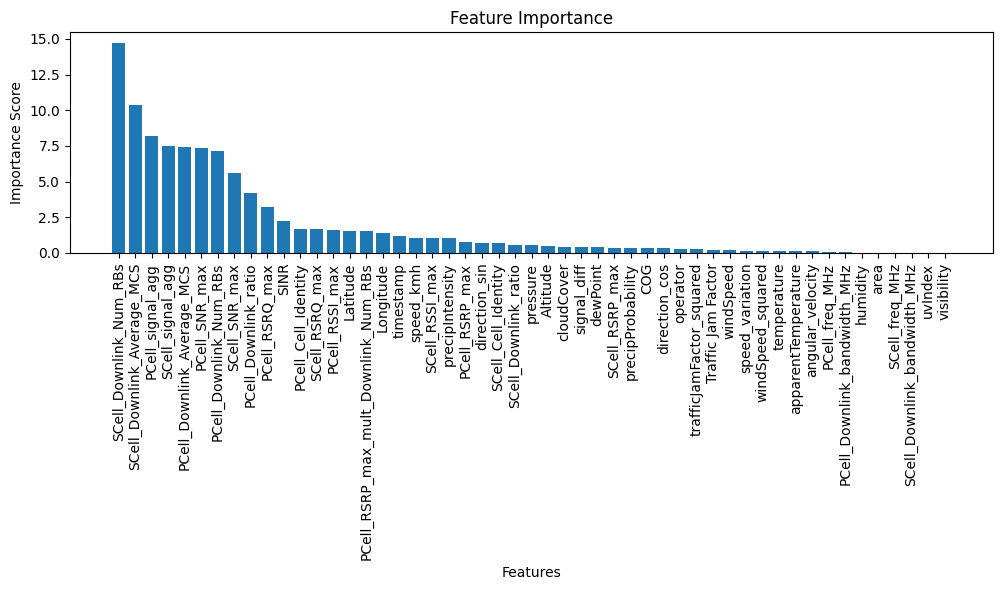

In [ ]:
# Get the feature importance scores
feature_importance = model.get_feature_importance()

# Get the feature names
feature_names = X.columns

# Sort the feature importance scores and names in descending order
sorted_indices = feature_importance.argsort()[::-1]
sorted_importance = feature_importance[sorted_indices]
sorted_names = feature_names[sorted_indices]

# Plot the feature importance scores as bar graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance)
plt.xticks(range(len(sorted_importance)), sorted_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()



In [ ]:
y_pred = model.predict(test)

In [ ]:

y_pred = modell.predict(test.values)

In [ ]:
y_pred

array([22323885.58414752, 58876569.48421124, 84964409.55388665, ...,
       20509483.12449178, 11205406.40649539, 32999284.42916946])

# Prediction algorithm

# Compute error metric

# Save results

In [ ]:
# Add index to results
predictions_df = pd.DataFrame({'id': test_df.id, 'target': y_pred})
predictions_df.to_csv("m10.csv", index = False)
predictions_df.head()

id        target
0  Id_ln0e0hfrgx  2.232389e+07
1  Id_svf7nz9fxv  5.887657e+07
2  Id_ww2mh07gwj  8.496441e+07
3  Id_v88r4y03ww  2.176838e+07
4  Id_2u4y4kzglh  4.075000e+06

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the XGBoost Regressor model
model = xgb.XGBRegressor(objective='reg:squarederror')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print("RMSE:", rmse)


XGBoostError: ignored